In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

### Pour eviter les warnings

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

### Lecture

In [4]:
data=pd.read_csv("C:/Users/SD.HEUNAMBIAFENG/Downloads/valeursfoncieres-2020.txt", sep="|", header=0,low_memory=False)

C:\Users\SD.HEUNAMBIAFENG\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_columns',200)

In [6]:
data.columns.size

43

In [7]:
data

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,"8000,00",NaN,NaN,NaN,B063,FORTUNAT,1250.0,CEYZERIAT,1,72,NaN,AK,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B006,BOIS DU CHAMP RION,1290.0,LAIZ,1,203,NaN,B,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B025,EN COROBERT,1290.0,LAIZ,1,203,NaN,B,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,C,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,87.0,4.0,S,NaN,447.0
2459556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0
2459557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,82.0,2.0,S,NaN,447.0
2459558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0


In [8]:
df=data.copy()

Exploratory Data Analysis
Analyse de la forme
Target:
Valeur fonciere


Nombre de lignes:
2459560

Nombre de colonnes:
43

Types de variables:
quantitatives: 21 qualitatives: 21

In [9]:
df.shape

(2459560, 43)

In [10]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

In [11]:
df.select_dtypes('float64').columns.size

17

In [12]:
df.select_dtypes('int64').columns.size

4

In [13]:
df.select_dtypes('O').columns.size

22

<AxesSubplot:>

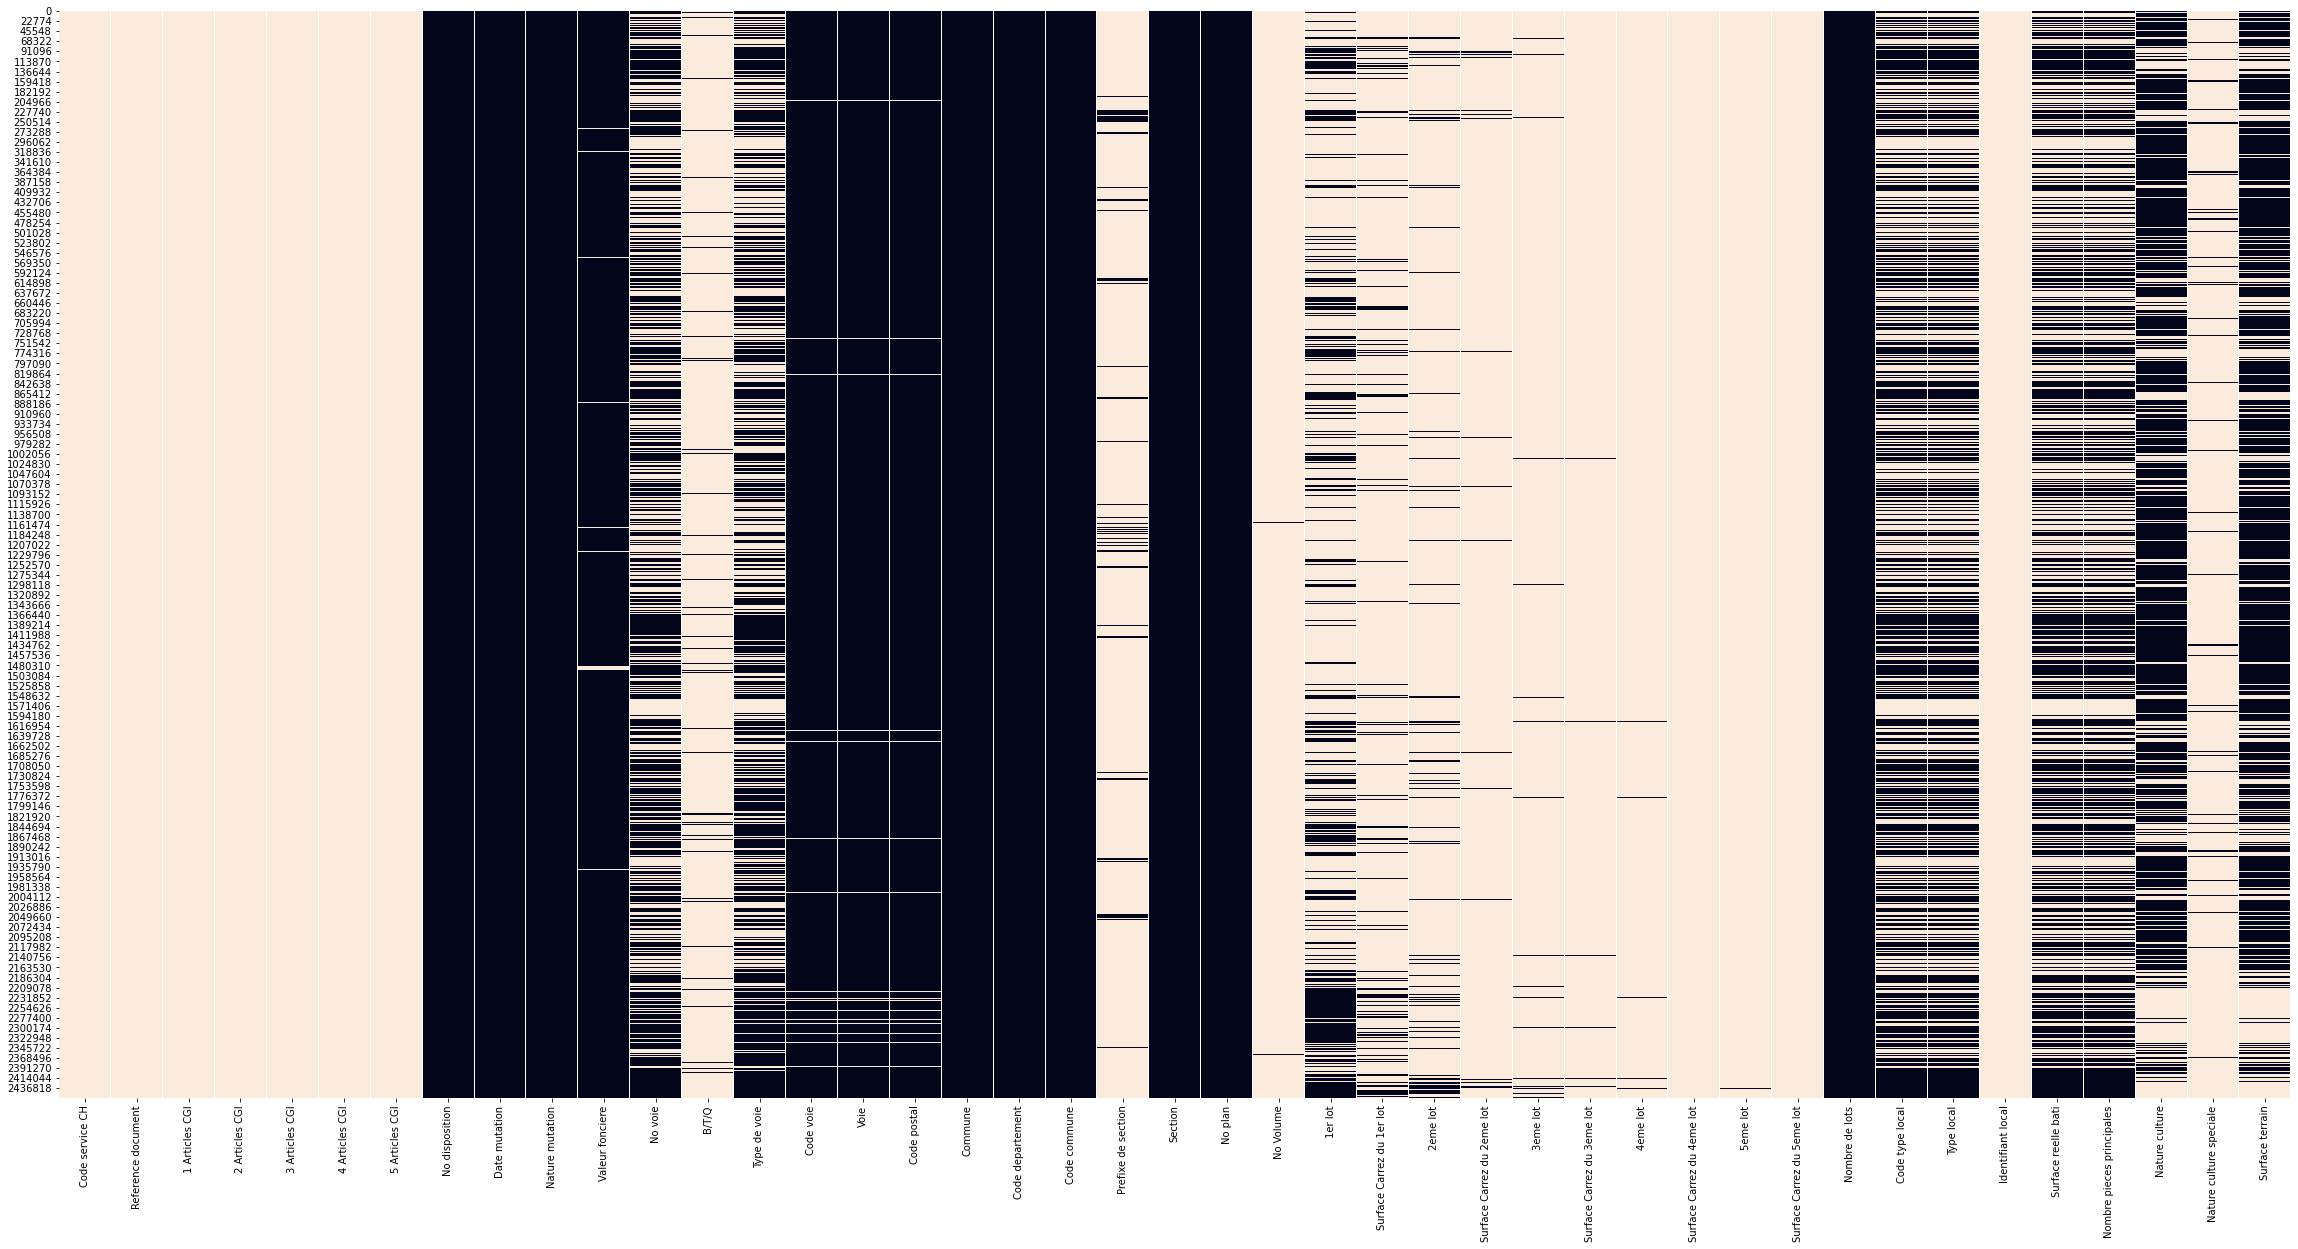

In [14]:
plt.figure(figsize=(40,20))

sns.heatmap(df.isna(), cbar=False)

## Taux de Nan par colonne

In [15]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Nombre de lots                0.000000
No plan                       0.000000
Code commune                  0.000000
Code departement              0.000000
Commune                       0.000000
No disposition                0.000000
Date mutation                 0.000000
Nature mutation               0.000000
Section                       0.000041
Code voie                     0.012583
Code postal                   0.012601
Voie                          0.012654
Valeur fonciere               0.012910
Nature culture                0.312119
Surface terrain               0.312119
No voie                       0.402651
Type de voie                  0.413873
Type local                    0.465012
Code type local               0.465012
Nombre pieces principales     0.465648
Surface reelle bati           0.465648
1er lot                       0.692226
Surface Carrez du 1er lot     0.914912
2eme lot                      0.936679
Prefixe de section            0.955681
Nature culture speciale  

In [297]:
df["Type local"].unique()

array(['nan', 'Maison', 'Appartement', 'Dépendance',
       'Local industriel. commercial ou assimilé'], dtype=object)

## Traitement de la cible

In [16]:
df['Valeur fonciere']=df['Valeur fonciere'].map(lambda x: float(str(x).split(sep=",")[0]))

In [17]:
df[df['Valeur fonciere'].isna()]['Nature mutation'].unique()

array(['Vente', 'Echange', 'Expropriation',
       "Vente en l'état futur d'achèvement", 'Vente terrain à bâtir',
       'Adjudication'], dtype=object)

In [18]:
df[(df['Nature mutation']== 'Expropriation') & (df['Valeur fonciere'].isna())].size

19221

### Observation du pourcentage de valeurs foncieres nulles par nature de mutation

In [19]:
df[(df['Nature mutation']== "Vente en l'état futur d'achèvement")]['Valeur fonciere'].isna().describe()

count     181174
unique         2
top        False
freq      181115
Name: Valeur fonciere, dtype: object

In [20]:
df['Nombre de lots'].unique()

array([  0,   2,   1,   3,   6,   5,   4,  15,   9,   7,  13,  11,  42,
         8,  12,  46,  26,  20,  10,  14, 107, 108,  21,  38,  19,  25,
        27,  16,  23,  43,  35,  17, 142,  24,  18,  28,  22,  30,  49,
        62,  40,  31,  50,  44,  34,  53,  51,  54,  37, 119,  93,  66,
        47,  36, 121,  32,  33,  90,  79,  61, 150,  80, 122,  55],
      dtype=int64)

In [21]:
df[(df["Surface terrain"].isna()==False)][["Surface reelle bati","Surface terrain", "Surface Carrez du 1er lot","Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot","Surface Carrez du 4eme lot","Surface Carrez du 5eme lot"]]

,Surface reelle bati,Surface terrain,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot
0,NaN,1061.0,NaN,NaN,NaN,NaN,NaN
1,NaN,85.0,NaN,NaN,NaN,NaN,NaN
2,NaN,1115.0,NaN,NaN,NaN,NaN,NaN
3,NaN,1940.0,NaN,NaN,NaN,NaN,NaN
4,NaN,1148.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2459554,27.0,447.0,NaN,NaN,NaN,NaN,NaN
2459555,87.0,447.0,NaN,NaN,NaN,NaN,NaN
2459556,0.0,447.0,NaN,NaN,NaN,NaN,NaN
2459557,82.0,447.0,NaN,NaN,NaN,NaN,NaN


In [22]:
df["Surface terrain"].isna().describe()

count     2459560
unique          2
top         False
freq      1691885
Name: Surface terrain, dtype: object

In [23]:
import shapefile

In [24]:
data_geo_shp=shapefile.Reader("C:/Users/SD.HEUNAMBIAFENG/Downloads/cadastre-75-parcelles-shp/parcelles.shp")

In [25]:
data_geo_prj=shapefile.Reader("C:/Users/SD.HEUNAMBIAFENG/Downloads/cadastre-75-parcelles-shp/parcelles.prj")

In [26]:
data_geo_shp_rec=data_geo_shp.shapeRecords()

In [27]:
data_geo_shp_rec[0].shape.points

[(650234.002498897, 6862851.438287678),
 (650234.2791882373, 6862852.047509729),
 (650233.9401427881, 6862853.573860253),
 (650231.3118064834, 6862865.316904626),
 (650230.9727626524, 6862866.843255492),
 (650230.5709981532, 6862867.046867041),
 (650232.2019779927, 6862870.724689496),
 (650231.6394889163, 6862871.007521732),
 (650287.167182263, 6862977.5050188145),
 (650287.8172176641, 6862977.165840372),
 (650288.5114828765, 6862978.561001522),
 (650289.4880437208, 6862980.365179981),
 (650288.3923298983, 6862980.919462877),
 (650294.9332776567, 6862993.373327287),
 (650388.3574574998, 6862947.325183289),
 (650446.240667786, 6862918.807359269),
 (650567.5829730285, 6862859.0015006885),
 (650567.1201653692, 6862858.071371834),
 (650497.6480209865, 6862717.930246055),
 (650487.3916250899, 6862723.133084894),
 (650234.002498897, 6862851.438287678),
 (650350.1493749963, 6862820.695679087),
 (650351.2563745163, 6862823.165946468),
 (650352.2781912617, 6862822.545589935),
 (650353.367277215

In [28]:
print ('number of shapes imported:',len(data_geo_shp.shapes()))

number of shapes imported: 77720


In [29]:
shape_ex = data_geo_shp.shape(0)

In [30]:
shape_ex

In [31]:
x_lon = np.zeros((len(shape_ex.points),1))
y_lat = np.zeros((len(shape_ex.points),1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

(650230.5709981532, 650567.5829730285)

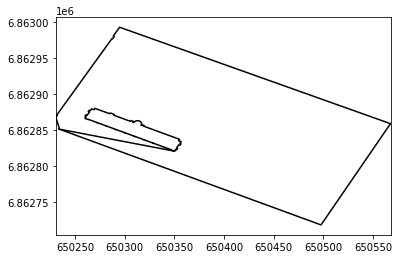

In [32]:
plt.plot(x_lon,y_lat,'k')

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])

In [33]:
shape_ex.bbox

[650230.5709981532, 6862717.930246055, 650567.5829730285, 6862993.373327287]

In [34]:
fields = data_geo_shp.fields

In [35]:
fields

[('DeletionFlag', 'C', 1, 0),
 ['id', 'C', 14, 0],
 ['commune', 'C', 5, 0],
 ['prefixe', 'C', 3, 0],
 ['section', 'C', 2, 0],
 ['numero', 'C', 4, 0],
 ['contenance', 'N', 12, 0],
 ['created', 'D', 8, 0],
 ['updated', 'D', 8, 0]]

In [36]:
rec = data_geo_shp.record(1000)
rec

Record #1000: ['75120000AA0030', '75120', '000', 'AA', '30', 499, datetime.date(2007, 9, 19), datetime.date(2016, 7, 26)]

In [37]:
data_geo_shp.record(1001)

Record #1001: ['75101000AR0108', '75101', '000', 'AR', '108', 12, datetime.date(2006, 10, 10), datetime.date(2016, 7, 21)]

In [38]:
shape_ex.bbox

[650230.5709981532, 6862717.930246055, 650567.5829730285, 6862993.373327287]

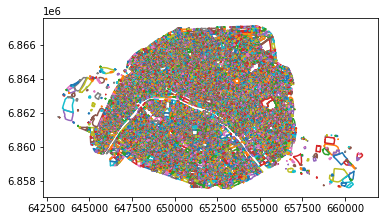

In [37]:
plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(data_geo_shp.iterShapes()):
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
        plt.plot(x_lon,y_lat)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints

            seg=shape.points[i0:i1+1]
            x_lon = np.zeros((len(seg),1))
            y_lat = np.zeros((len(seg),1))
            for ip in range(len(seg)):
                x_lon[ip] = seg[ip][0]
                y_lat[ip] = seg[ip][1]

            plt.plot(x_lon,y_lat)
plt.show()

In [39]:
shapeRecs = data_geo_shp.shapeRecords()

In [40]:
shapeRecs[0].shape.points

[(650234.002498897, 6862851.438287678),
 (650234.2791882373, 6862852.047509729),
 (650233.9401427881, 6862853.573860253),
 (650231.3118064834, 6862865.316904626),
 (650230.9727626524, 6862866.843255492),
 (650230.5709981532, 6862867.046867041),
 (650232.2019779927, 6862870.724689496),
 (650231.6394889163, 6862871.007521732),
 (650287.167182263, 6862977.5050188145),
 (650287.8172176641, 6862977.165840372),
 (650288.5114828765, 6862978.561001522),
 (650289.4880437208, 6862980.365179981),
 (650288.3923298983, 6862980.919462877),
 (650294.9332776567, 6862993.373327287),
 (650388.3574574998, 6862947.325183289),
 (650446.240667786, 6862918.807359269),
 (650567.5829730285, 6862859.0015006885),
 (650567.1201653692, 6862858.071371834),
 (650497.6480209865, 6862717.930246055),
 (650487.3916250899, 6862723.133084894),
 (650234.002498897, 6862851.438287678),
 (650350.1493749963, 6862820.695679087),
 (650351.2563745163, 6862823.165946468),
 (650352.2781912617, 6862822.545589935),
 (650353.367277215

In [41]:
shapeRecs[0].shape.bbox

[650230.5709981532, 6862717.930246055, 650567.5829730285, 6862993.373327287]

In [42]:
shapeRecs[1].shape.bbox

[650259.9634964054, 6862820.695679087, 650356.8806280041, 6862880.351687222]

In [43]:
shapeRecs[0].record

Record #-1: ['75101000AB0002', '75101', '000', 'AB', '2', 45688, datetime.date(2006, 10, 6), datetime.date(2016, 7, 21)]

In [44]:
shapeRecs[1].record

Record #-1: ['75101000AB0001', '75101', '000', 'AB', '1', 1731, datetime.date(2006, 10, 6), datetime.date(2016, 7, 21)]

In [45]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [46]:
shapefile_df = read_shapefile(data_geo_shp)

## Données géographiques

In [47]:
shapefile_df

,id,commune,prefixe,section,numero,contenance,created,updated,coords
0,75101000AB0002,75101,000,AB,2,45688.0,2006-10-06,2016-07-21,"[(650234.002498897, 6862851.438287678), (65023..."
1,75101000AB0001,75101,000,AB,1,1731.0,2006-10-06,2016-07-21,"[(650350.1493749963, 6862820.695679087), (6503..."
2,75101000AC0002,75101,000,AC,2,49342.0,2006-10-06,2016-07-21,"[(650388.3574574998, 6862947.325183289), (6502..."
3,75101000AC0001,75101,000,AC,1,993.0,2006-10-06,2016-07-21,"[(650448.4376878919, 6863052.995753481), (6504..."
4,75101000AD0001,75101,000,AD,1,64760.0,2006-10-06,2016-07-21,"[(650915.7592440435, 6862686.995086259), (6508..."
...,...,...,...,...,...,...,...,...,...
77715,75120000ED0001,75120,000,ED,1,459.0,2007-09-28,2016-07-26,"[(656897.9509424589, 6861156.848863987), (6569..."
77716,75120000ED0026,75120,000,ED,26,160.0,2012-12-17,2016-07-26,"[(656946.2766541241, 6861107.562781846), (6569..."
77717,75120000ED0019,75120,000,ED,19,34.0,2012-08-03,2016-07-26,"[(657119.6895101306, 6861083.659383055), (6571..."
77718,75120000ED0018,75120,000,ED,18,75.0,2012-08-03,2016-07-26,"[(657138.7334787633, 6861087.621664294), (6571..."


In [298]:
shapefile_df["created"].sort_values()

49328    2006-06-26
49586    2006-06-26
49435    2006-06-26
49519    2006-06-26
49520    2006-06-26
            ...    
40588    2021-01-25
40655    2021-01-25
38966    2021-01-25
41299    2021-02-22
41316    2021-02-22
Name: created, Length: 77720, dtype: object

In [299]:
shapefile_df["updated"].sort_values()

63198    2014-02-12
14086    2014-02-12
14085    2014-02-12
14084    2014-02-12
16542    2014-02-12
            ...    
41014    2021-04-07
60673    2021-04-14
70179    2021-04-15
65346    2021-04-15
65189    2021-04-15
Name: updated, Length: 77720, dtype: object

## Données des transactions immobilières

In [48]:
df

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,8000.0,NaN,NaN,NaN,B063,FORTUNAT,1250.0,CEYZERIAT,1,72,NaN,AK,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,2175.0,NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,2175.0,NaN,NaN,NaN,B006,BOIS DU CHAMP RION,1290.0,LAIZ,1,203,NaN,B,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,2175.0,NaN,NaN,NaN,B025,EN COROBERT,1290.0,LAIZ,1,203,NaN,B,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,2175.0,NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,C,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,87.0,4.0,S,NaN,447.0
2459556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0
2459557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,82.0,2.0,S,NaN,447.0
2459558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0


## Noms des colonnes en commun 

In [49]:
Join=[]
for col in df.columns:
    if (col in shapefile_df.columns):
        Join.append(col)

In [50]:
Join

[]

### On constate qu'il n'y en a aucune

In [51]:
df.iloc[0,:]

Code service CH                      NaN
Reference document                   NaN
1 Articles CGI                       NaN
2 Articles CGI                       NaN
3 Articles CGI                       NaN
4 Articles CGI                       NaN
5 Articles CGI                       NaN
No disposition                         1
Date mutation                 07/01/2020
Nature mutation                    Vente
Valeur fonciere                   8000.0
No voie                              NaN
B/T/Q                                NaN
Type de voie                         NaN
Code voie                           B063
Voie                            FORTUNAT
Code postal                       1250.0
Commune                        CEYZERIAT
Code departement                       1
Code commune                          72
Prefixe de section                   NaN
Section                               AK
No plan                              216
No Volume                            NaN
1er lot         

## Traitement de la clé de jointure

Ell est constituée de la concatenation de:
"Code departement", "Code commune","prefixe" "section" "numero"

In [52]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_columns',200)

## Code departement - Commune

In [53]:
df['Code commune']

0           72
1          203
2          203
3          203
4          203
          ... 
2459555    104
2459556    104
2459557    104
2459558    104
2459559    102
Name: Code commune, Length: 2459560, dtype: int64

In [54]:
df["Prefixe de section"].isna().describe()

count     2459560
unique          2
top          True
freq      2350554
Name: Prefixe de section, dtype: object

In [55]:
df[["Code postal","Section","No plan"]].isna().describe()

,Code postal,Section,No plan
count,2459560,2459560,2459560
unique,2,2,1
top,False,False,False
freq,2428568,2459459,2459560


In [56]:
df[df["Code departement"]=='75']

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain


In [57]:
df["Code departement"]= df["Code departement"].map(str)

In [58]:
df["Nature mutation"]=df["Nature mutation"].map(str)

In [59]:
df["Type local"]=df["Type local"].map(str)

## Filtre sur le type de mutation, le type de local et le departement et sur le nombre de lots

In [60]:
nombre_de_lot=2

In [61]:
df_no_Na=df[(df["Valeur fonciere"].isna()==False) & (df["Code departement"]=="75") & (df["Nature mutation"]=="Vente") & (df["Type local"]=="Appartement") & (df["Nombre de lots"]<nombre_de_lot) ].copy()

In [62]:
df_no_Na['Arrondissement']=df['Code departement']+df['Code commune'].map(str)

In [63]:
df_no_Na

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Arrondissement
2405433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/01/2020,Vente,680000.0,10.0,NaN,RUE,1200,DU BOURG L ABBE,75003.0,PARIS 03,75,103,NaN,AV,6,NaN,9,"50,74",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,51.0,2.0,NaN,NaN,NaN,75103
2405435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2020,Vente,852000.0,24.0,NaN,RUE,8716,DE SAINTONGE,75003.0,PARIS 03,75,103,NaN,AK,80,NaN,74,"66,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,19.0,1.0,NaN,NaN,NaN,75103
2405436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2020,Vente,852000.0,24.0,NaN,RUE,8716,DE SAINTONGE,75003.0,PARIS 03,75,103,NaN,AK,80,NaN,74,"66,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,12.0,1.0,NaN,NaN,NaN,75103
2405437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,08/01/2020,Vente,6000.0,7.0,NaN,AV,3824,FRANKLIN D ROOSEVELT,75008.0,PARIS 08,75,108,NaN,AL,13,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,79.0,3.0,NaN,NaN,NaN,75108
2405438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2020,Vente,2350000.0,83.0,NaN,RUE,6419,DE MONCEAU,75008.0,PARIS 08,75,108,NaN,CG,26,NaN,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,174.0,5.0,NaN,NaN,NaN,75108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,40.0,2.0,S,NaN,447.0,75104
2459553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,29.0,2.0,S,NaN,447.0,75104
2459554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,27.0,2.0,S,NaN,447.0,75104
2459555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,87.0,4.0,S,NaN,447.0,75104


In [64]:
df["Nature mutation"].unique()

array(['Vente', 'Vente terrain à bâtir', 'Echange',
       "Vente en l'état futur d'achèvement", 'Adjudication',
       'Expropriation'], dtype=object)

In [65]:
df_no_Na["Section"].isna().describe()

count     16803
unique        1
top       False
freq      16803
Name: Section, dtype: object

In [66]:
df_no_Na["No plan"].isna().describe()

count     16803
unique        1
top       False
freq      16803
Name: No plan, dtype: object

## Jointure

In [67]:
df_to_join=df_no_Na

In [68]:
df_to_join["Prefixe de section"]=df_to_join["Prefixe de section"].map(lambda x:"000")

In [69]:
df_to_join["jointure"]=df_to_join["Arrondissement"].map(str)+ df_to_join["Prefixe de section"].map(str)+ df_to_join["Section"].map(str)+df_to_join["No plan"].map(str)

In [70]:
df_to_join["Arrondissement"]

2405433    75103
2405435    75103
2405436    75103
2405437    75108
2405438    75108
           ...  
2459552    75104
2459553    75104
2459554    75104
2459555    75104
2459557    75104
Name: Arrondissement, Length: 16803, dtype: object

In [71]:
df_to_join["jointure"]

2405433     75103000AV6
2405435    75103000AK80
2405436    75103000AK80
2405437    75108000AL13
2405438    75108000CG26
               ...     
2459552    75104000AW19
2459553    75104000AW19
2459554    75104000AW19
2459555    75104000AW19
2459557    75104000AW19
Name: jointure, Length: 16803, dtype: object

In [72]:
df_to_join.shape

(16803, 45)

In [73]:
shapefile_df["jointure"]=shapefile_df["commune"].map(str)+"000"+shapefile_df["section"].map(str)+shapefile_df["numero"].map(str)

In [74]:
df_to_join=df_to_join.set_index("jointure")

In [75]:
shapefile_df_to_join=shapefile_df.set_index("jointure")

In [76]:
shapefile_df_to_join.index

Index(['75101000AB2', '75101000AB1', '75101000AC2', '75101000AC1',
       '75101000AD1', '75104000AB64', '75104000AB86', '75104000AB85',
       '75104000AB88', '75104000AB60',
       ...
       '75120000ED15', '75120000ED22', '75120000ED24', '75120000ED25',
       '75120000ED21', '75120000ED1', '75120000ED26', '75120000ED19',
       '75120000ED18', '75120000ED27'],
      dtype='object', name='jointure', length=77720)

In [77]:
data_merged= pd.concat([df_to_join,shapefile_df_to_join],axis=1, join='inner', keys=["jointure"])

In [78]:
data_merged= df_to_join.join(shapefile_df_to_join, how="inner")

In [79]:
data_merged

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Arrondissement,id,commune,prefixe,section,numero,contenance,created,updated,coords
jointure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
75101000AK18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28/09/2020,Vente,100.0,28.0,NaN,QUAI,5824,DU LOUVRE,75001.0,PARIS 01,75,101,000,AK,18,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,110.0,2.0,NaN,NaN,NaN,75101,75101000AK0018,75101,000,AK,18,224.0,2006-10-09,2016-07-21,"[(651622.7919587007, 6862327.400295994), (6516..."
75101000AL10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,23/12/2020,Vente,1220000.0,12.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,10,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,51.0,3.0,NaN,NaN,NaN,75101,75101000AL0010,75101,000,AL,10,256.0,2006-10-09,2016-07-21,"[(651791.2734951854, 6862074.719433691), (6517..."
75101000AL27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,14/09/2020,Vente,1250000.0,23.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,27,NaN,1,"62,50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,62.0,4.0,NaN,NaN,NaN,75101,75101000AL0027,75101,000,AL,27,147.0,2006-10-09,2016-07-21,"[(651703.3420849448, 6862045.939602381), (6517..."
75101000AL28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,26/08/2020,Vente,1200000.0,68.0,NaN,QUAI,6920,DES ORFEVRES,75001.0,PARIS 01,75,101,000,AL,28,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,40.0,1.0,NaN,NaN,NaN,75101,75101000AL0028,75101,000,AL,28,61.0,2006-10-09,2016-07-21,"[(651693.7920108116, 6862048.120881027), (6516..."
75101000AL3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,15/06/2020,Vente,3100000.0,24.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,3,NaN,27,"51,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,52.0,2.0,NaN,NaN,NaN,75101,75101000AL0003,75101,000,AL,3,324.0,2006-10-09,2016-07-21,"[(651720.5072086777, 6862089.375383045), (6517..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75120000EC22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20/10/2020,Vente,834250.0,11.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,22,NaN,85,"92,75",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,94.0,5.0,NaN,NaN,NaN,75120,75120000EC0022,75120,000,EC,22,2927.0,2007-09-28,2014-11-04,"[(656703.2464831937, 6861090.670229163), (6567..."
75120000EC25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,14/01/2020,Vente,250000.0,19.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,25,NaN,28,"28,52",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,28.0,1.0,NaN,NaN,NaN,75120,75120000EC0025,75120,000,EC,25,681.0,2007-09-28,2014-11-04,"[(656756.5509782564, 6861110.776964385), (6567..."
75120000EC27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20/11/2020,Vente,320800.0,25.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,27,NaN,11,"38,39",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,33.0,2.0,NaN,NaN,NaN,75120,75120000EC0027,75120,000,EC,27,138.0,2007-09-28,2014-11-04,"[(656772.9612026982, 6861158.113540209), (6567..."


In [80]:
data_merged.columns.size

53

In [81]:
Commun=[]
for index in df_to_join.index:
    if index in shapefile_df_to_join.index:
        Commun.append(index)

In [82]:
len(Commun)

16784

## Traitement du fichier joint

In [83]:
df_joint=data_merged

### Indicateur de prix au mètre carré
On en a besoin pour donner un prix représentatif par emplacement etant donné les différentes surfaces et valeurs foncières

In [84]:
df_joint["Prix"]=df_joint["Valeur fonciere"]/df_joint["Surface reelle bati"]

### Outliers de prix par commune

In [85]:
df_joint.groupby(["commune"])["Prix"].describe()

,count,mean,std,min,25%,50%,75%,max
commune,,,,,,,,
75101,272.0,245768.305576,8.146453e+05,0.011364,11077.235772,14774.953008,82727.272727,6.560000e+06
75102,420.0,69015.113710,1.569585e+05,0.010000,10461.981567,12788.203125,16364.583333,1.171591e+06
75103,517.0,60286.336705,1.558887e+05,0.007042,11083.673469,13650.793651,25000.000000,1.783333e+06
75104,346.0,37323.846606,9.115281e+04,0.018868,11338.541667,14031.250000,18940.797222,9.708333e+05
75105,479.0,35017.003975,9.525772e+04,0.006369,10563.492063,12962.962963,16054.166667,8.000000e+05
75106,538.0,257496.181125,1.019175e+06,0.043478,13292.998120,17391.483516,53333.333333,1.862827e+07
75107,409.0,49221.186497,1.987836e+05,0.027778,12395.833333,15000.000000,20769.230769,3.333333e+06
75108,538.0,474750.227028,1.587310e+06,0.006061,11445.175439,16989.876761,284455.205811,2.233333e+07
75109,800.0,111907.658575,2.932485e+05,0.009346,10207.270408,12998.461538,65112.745098,4.366707e+06


In [86]:
df_joint.groupby(["commune"])["Prix"]

In [87]:
df_joint.columns.size

54

## Histogramme de la distribution des prix par commune

(0.011363636363636364, 6560000.0)


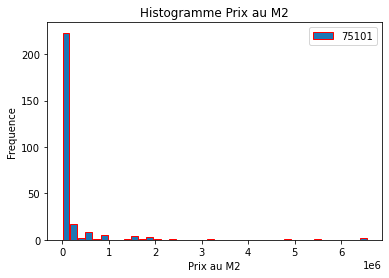

(0.01, 1171590.9090909092)


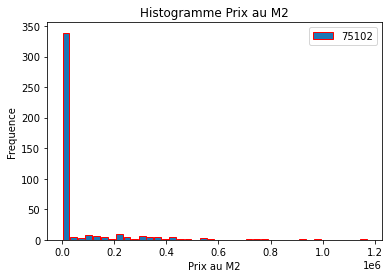

(0.007042253521126761, 1783333.3333333333)


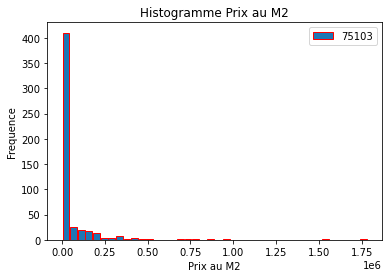

(0.018867924528301886, 970833.3333333334)


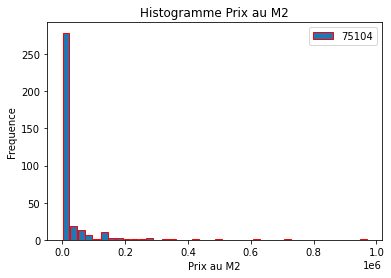

(0.006369426751592357, 800000.0)


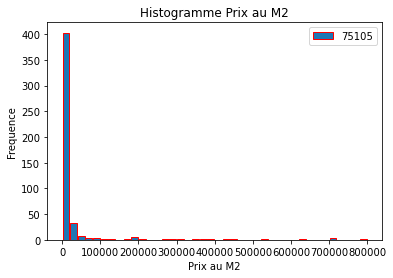

(0.043478260869565216, 18628267.2)


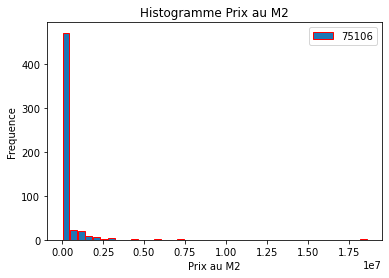

(0.027777777777777776, 3333333.3333333335)


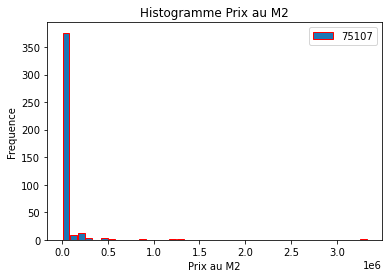

(0.006060606060606061, 22333333.333333332)


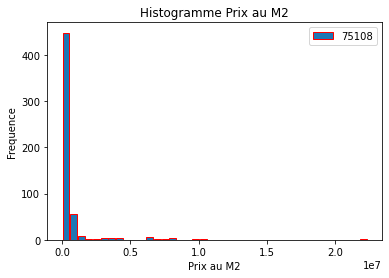

(0.009345794392523364, 4366707.047619048)


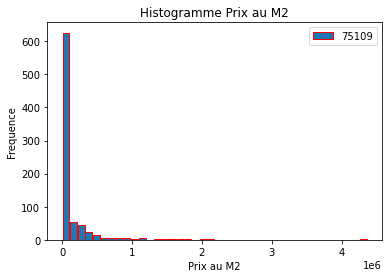

(0.0125, 2300000.0)


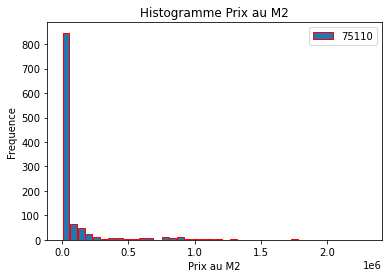

(0.019230769230769232, 1800000.0)


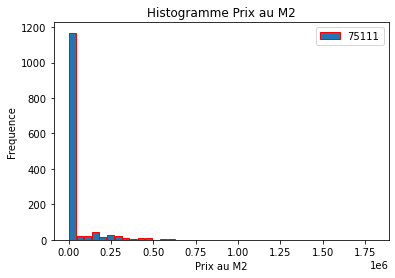

(9.375, 1205555.5555555555)


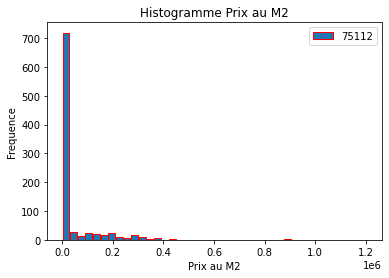

(0.030303030303030304, 683333.3333333334)


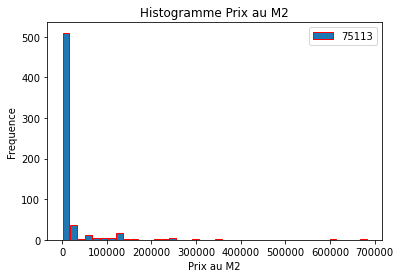

(5.0, 712043.7058823529)


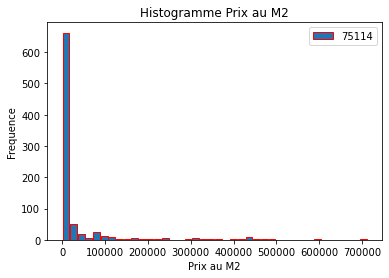

(0.01020408163265306, 631743.75)


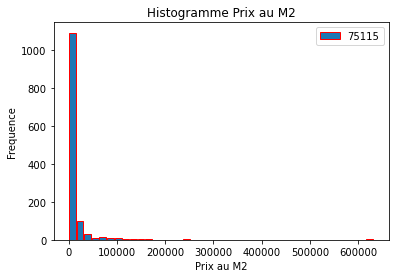

(0.008, 2100000.0)


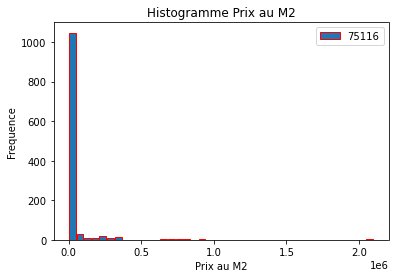

(0.023255813953488372, 1700000.0)


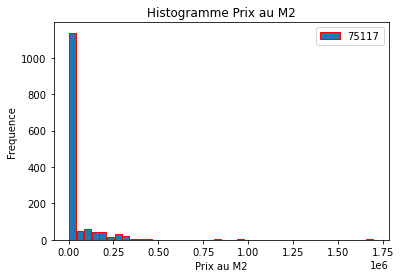

(0.015384615384615385, 1403250.0)


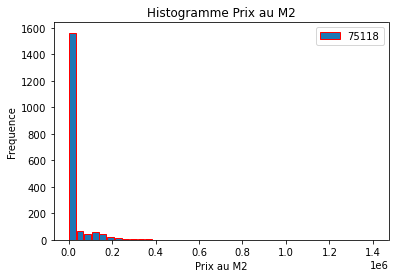

(2.5, 320000.0)


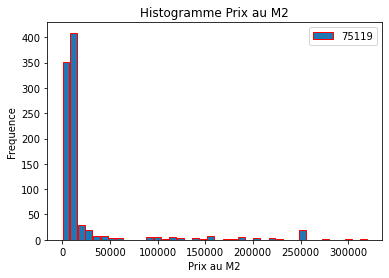

(0.024390243902439025, 1145454.5454545454)


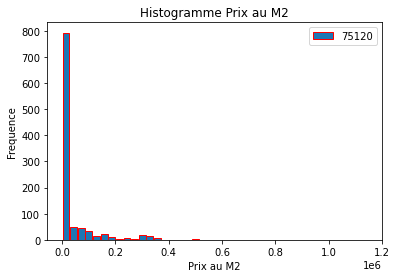

In [88]:

for com in df_joint["commune"].unique():
    range_hist=(df_joint[df_joint["commune"]==com]["Prix"].min(),df_joint[df_joint["commune"]==com]["Prix"].max())
    print(range_hist)
    plt.hist(df_joint[df_joint["commune"]==com]["Prix"].values,range=range_hist,rwidth=0.9,edgecolor="red",bins=40, label=com)
    plt.title("Histogramme Prix au M2")
    plt.xlabel("Prix au M2")
    plt.ylabel("Frequence")
    plt.legend()
    plt.show()

## Diagramme de densité

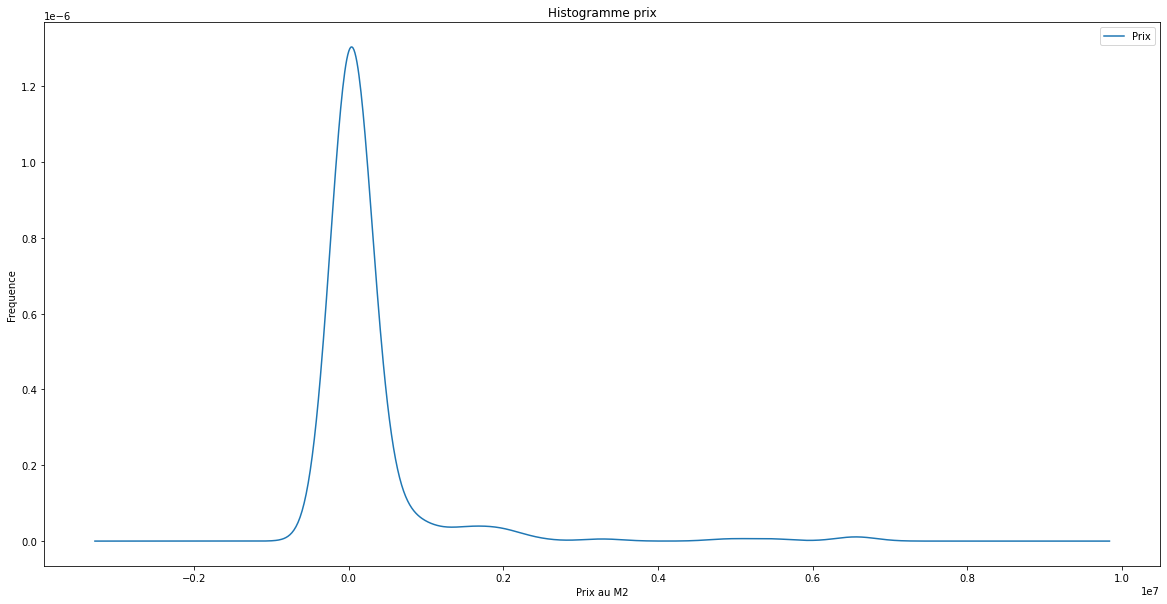

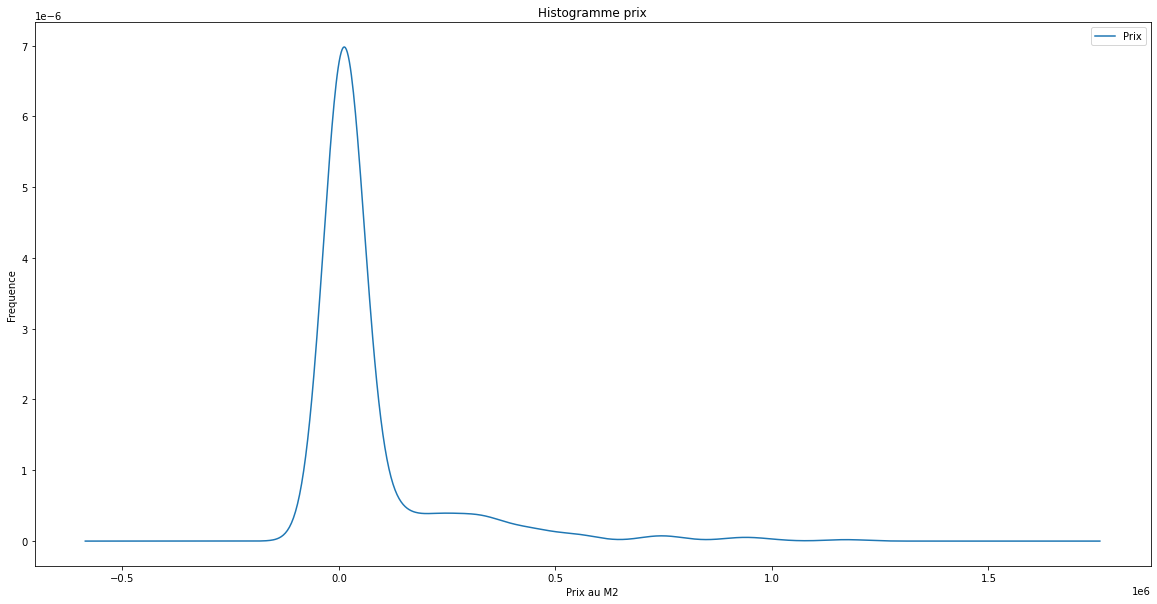

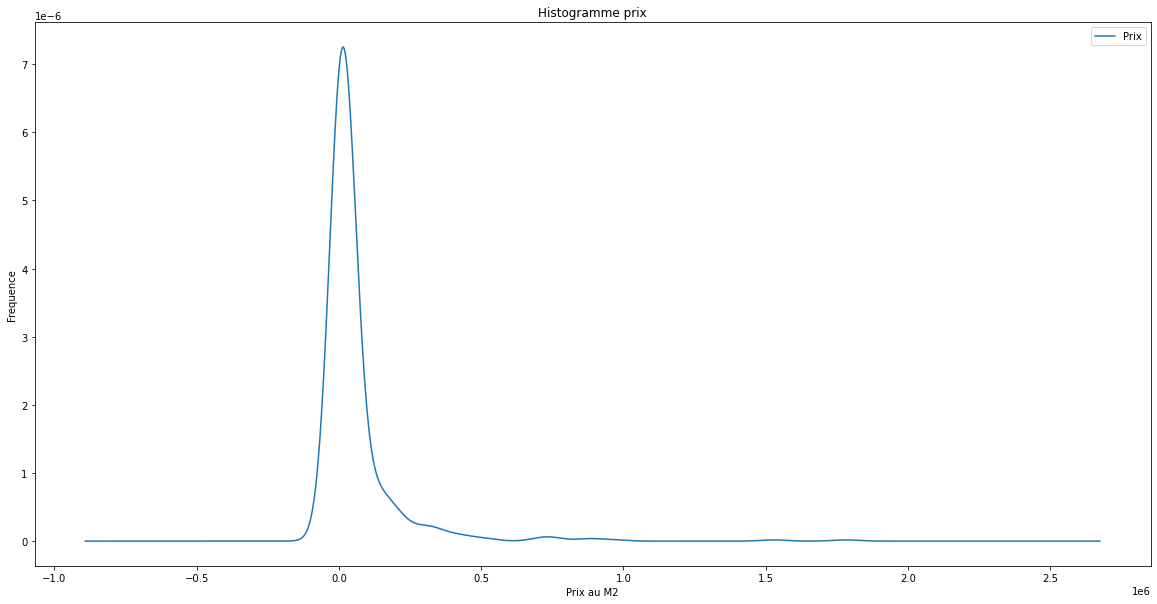

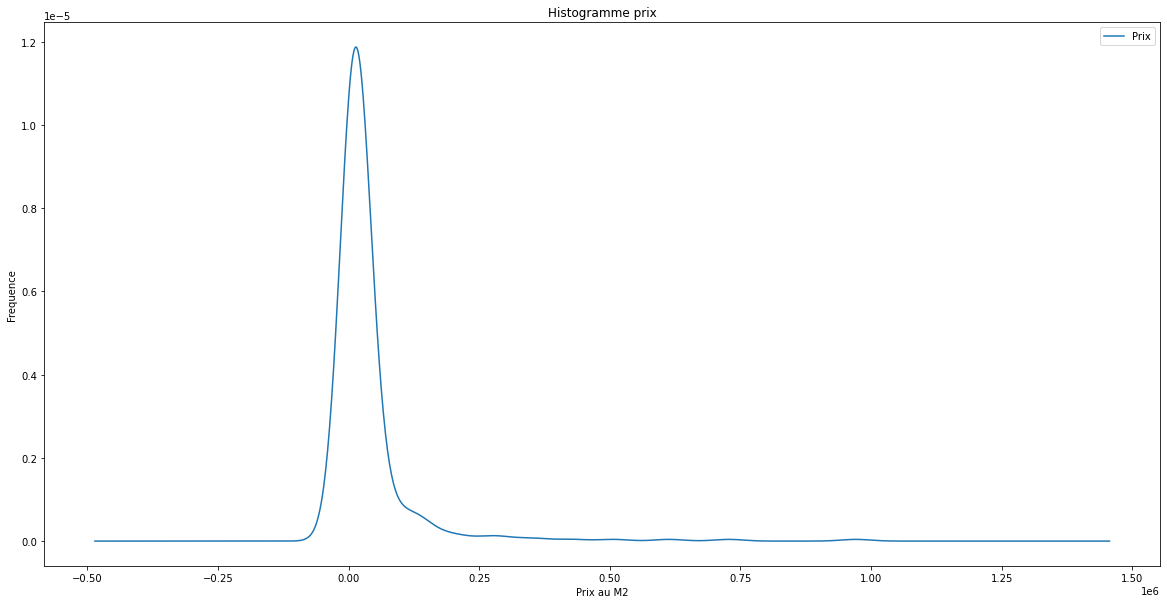

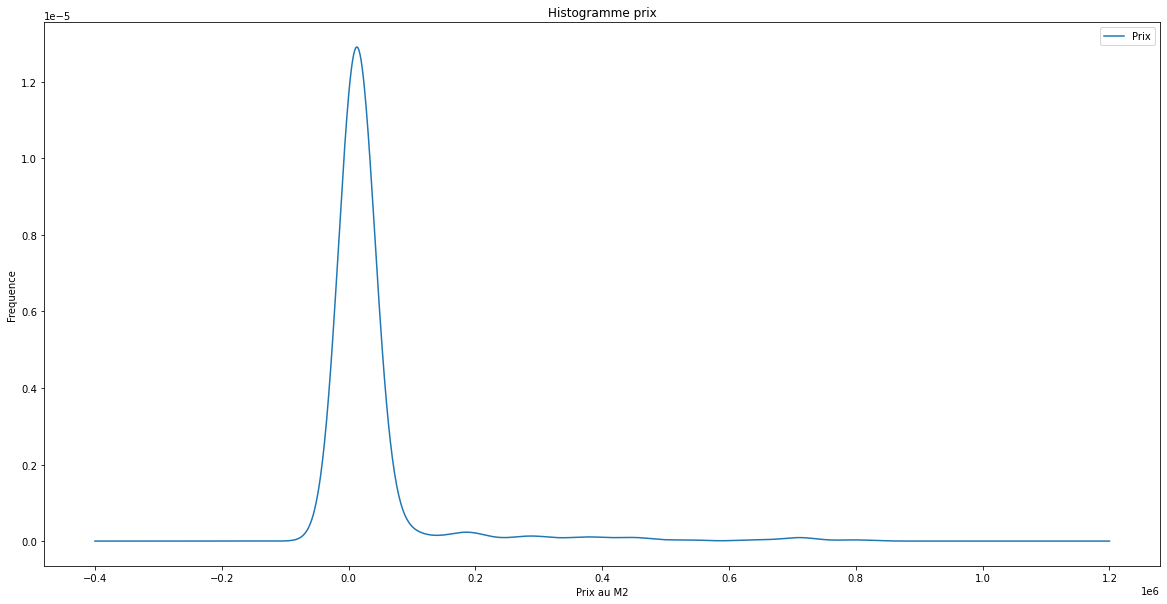

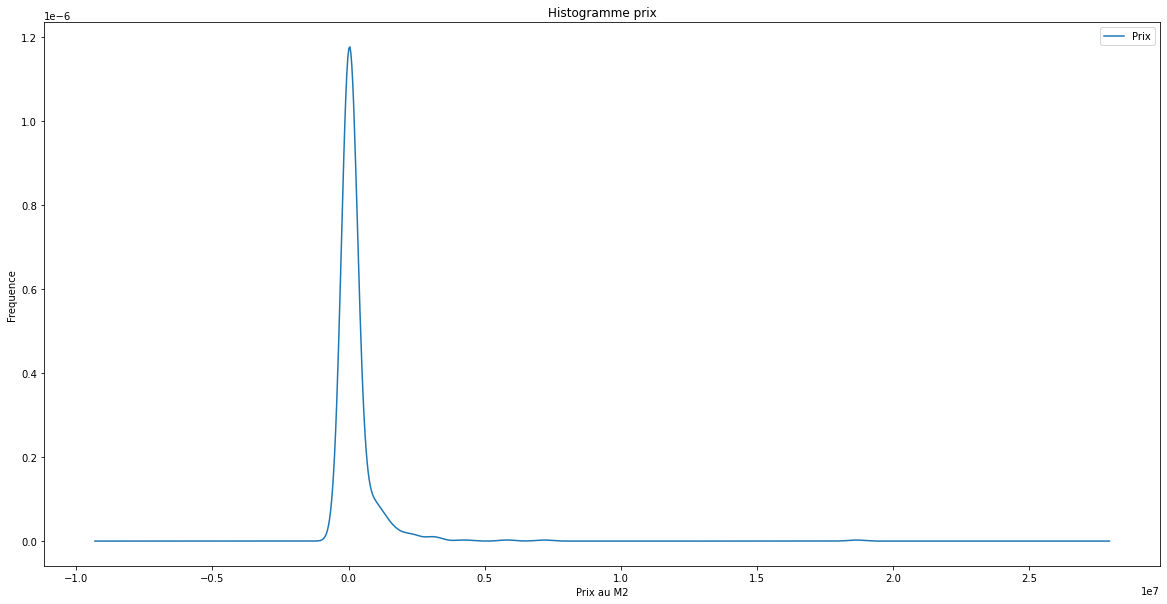

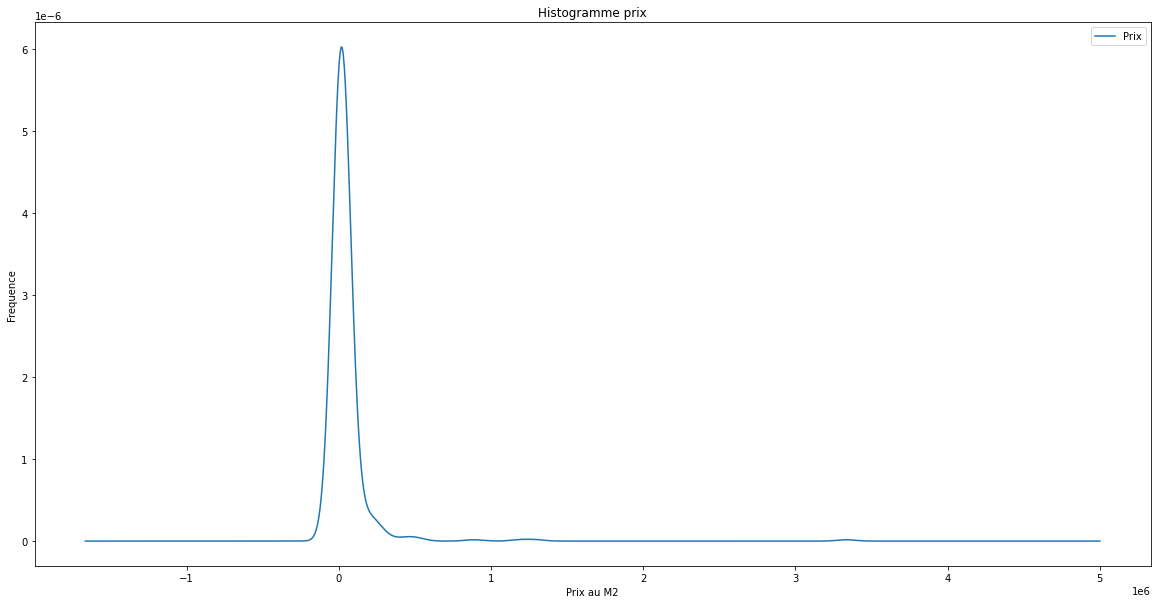

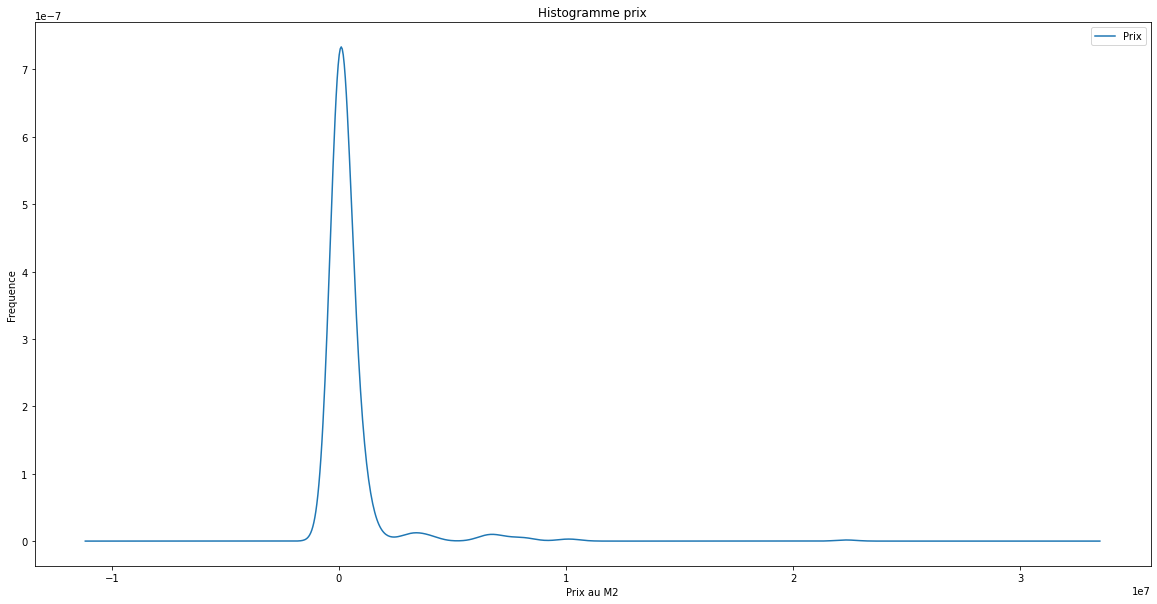

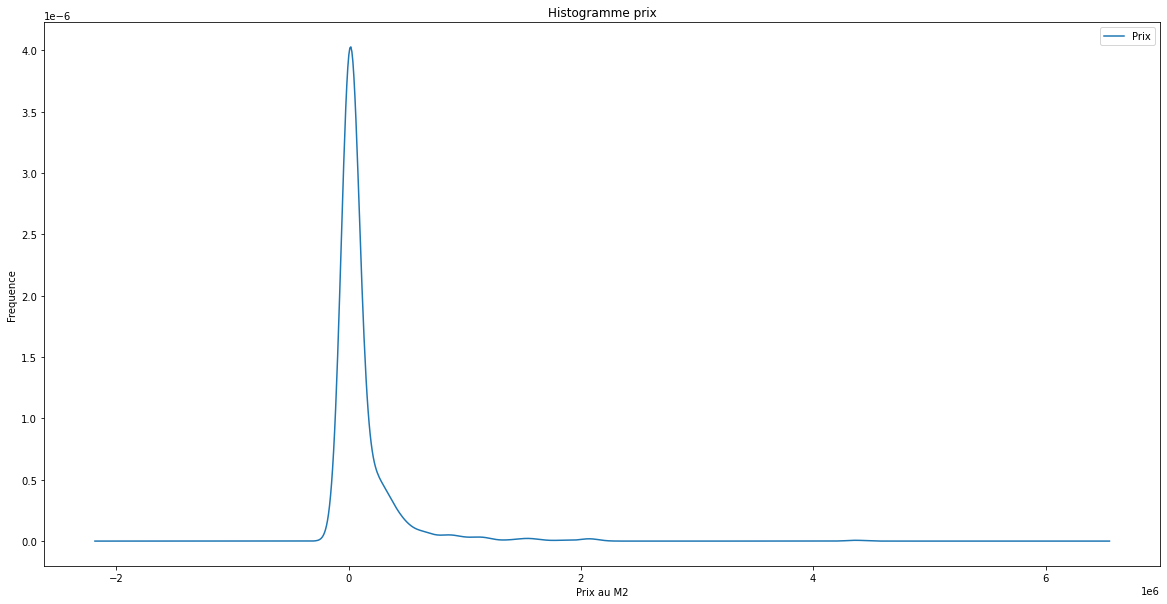

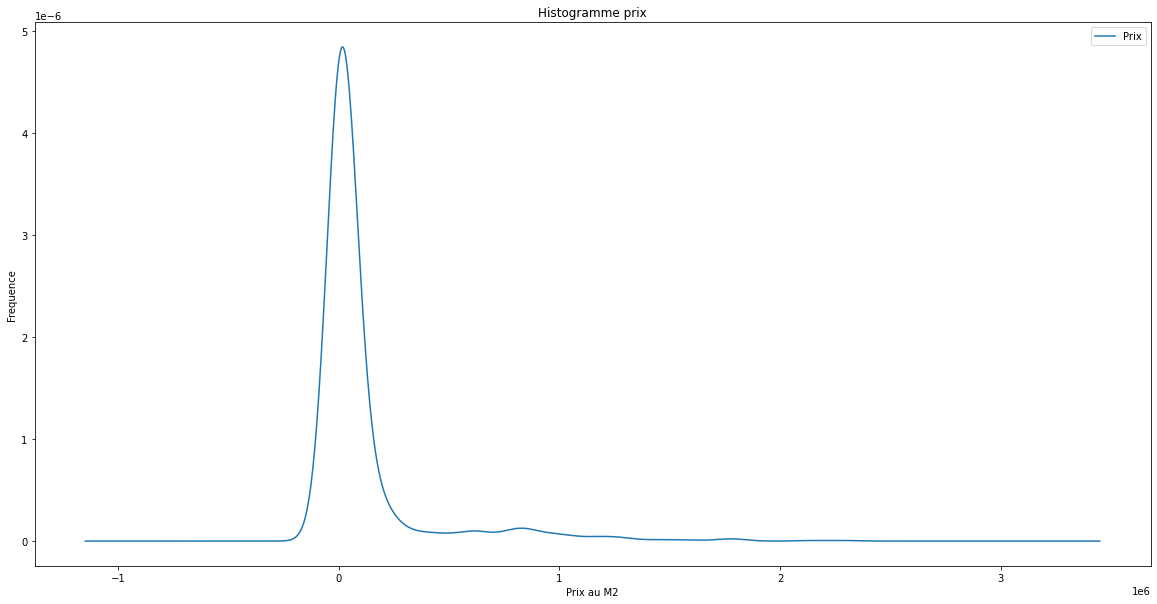

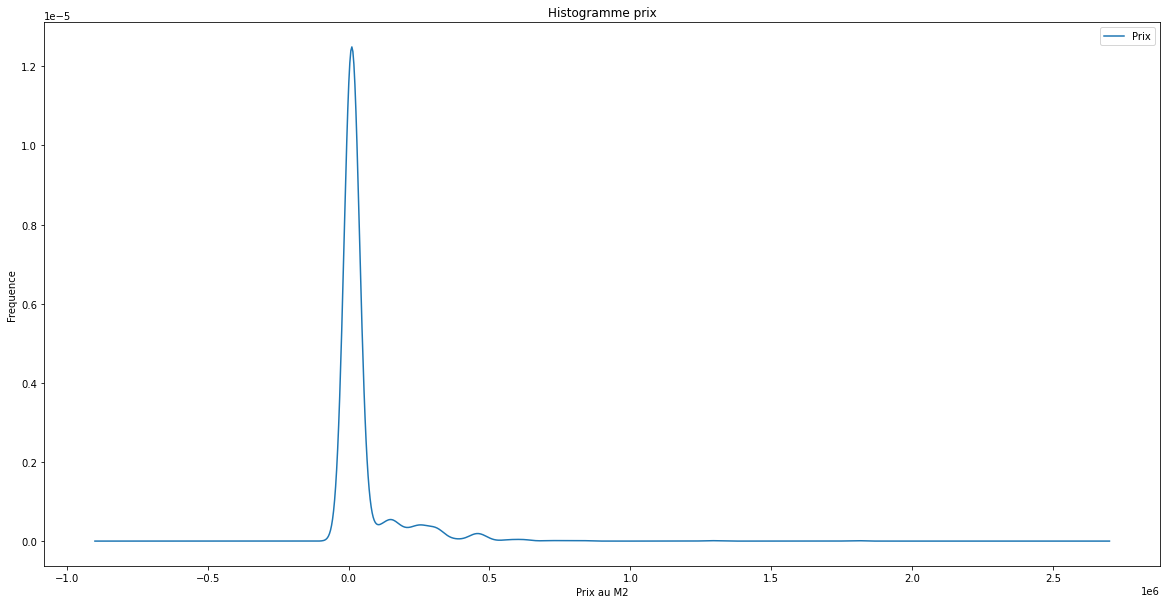

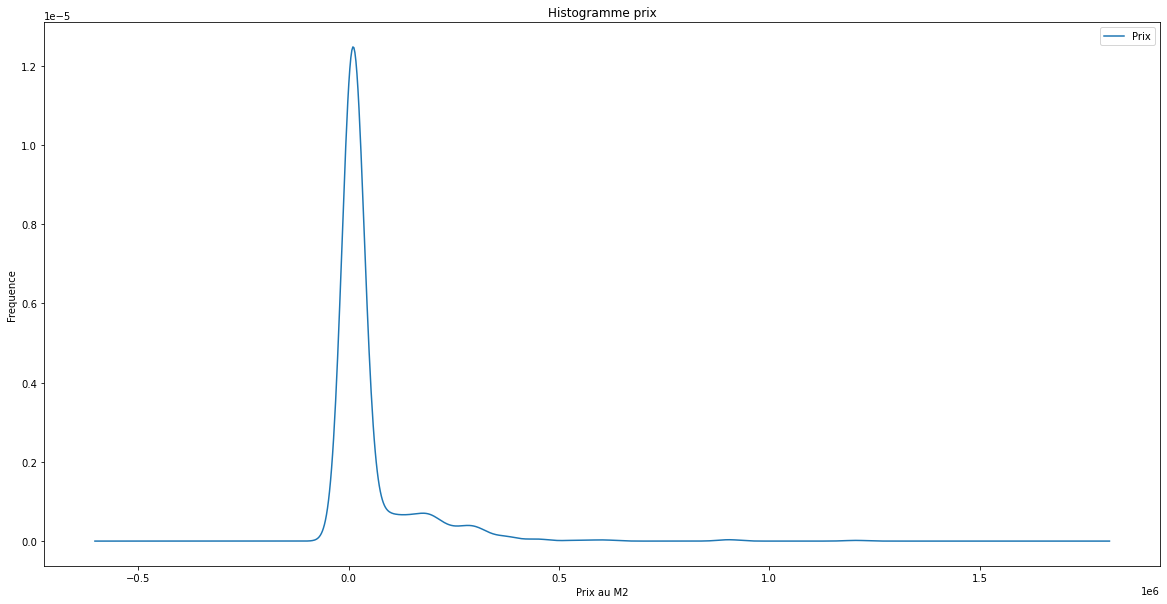

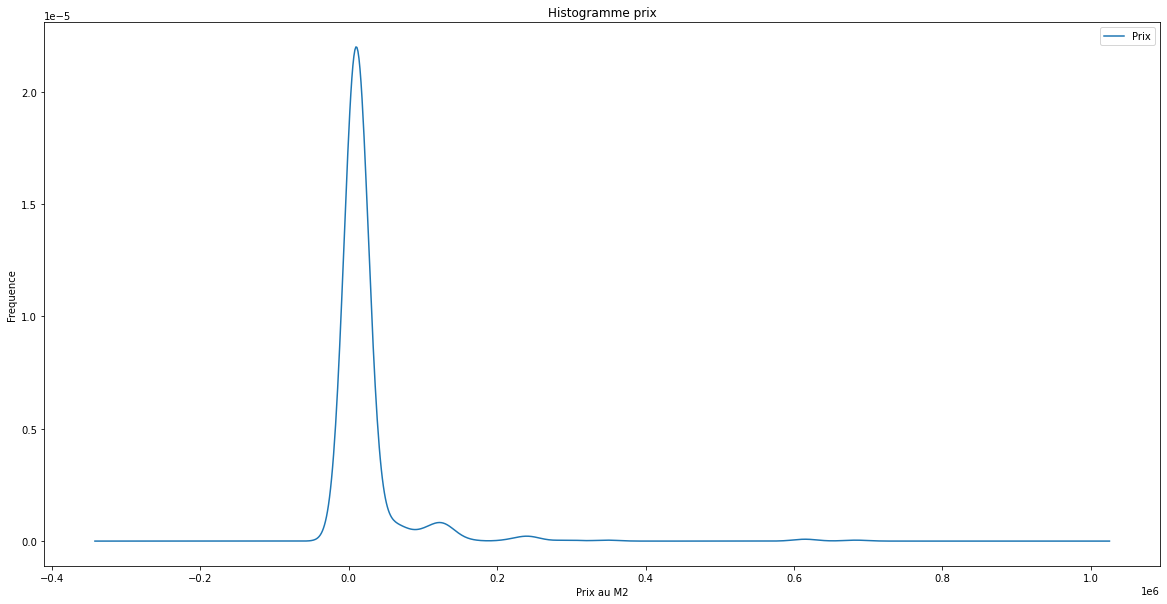

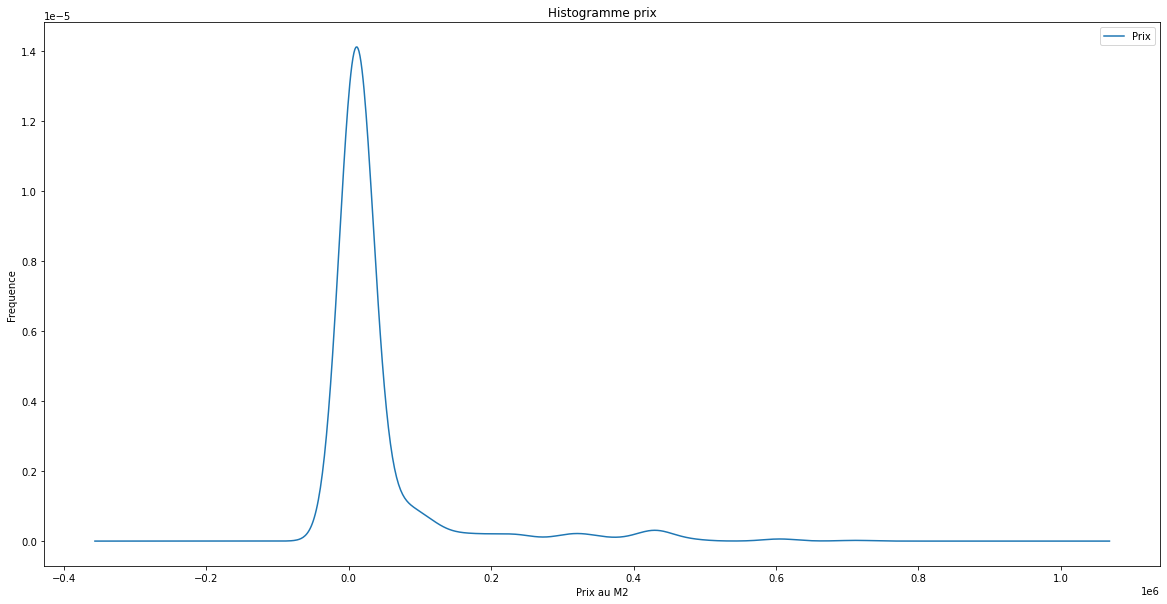

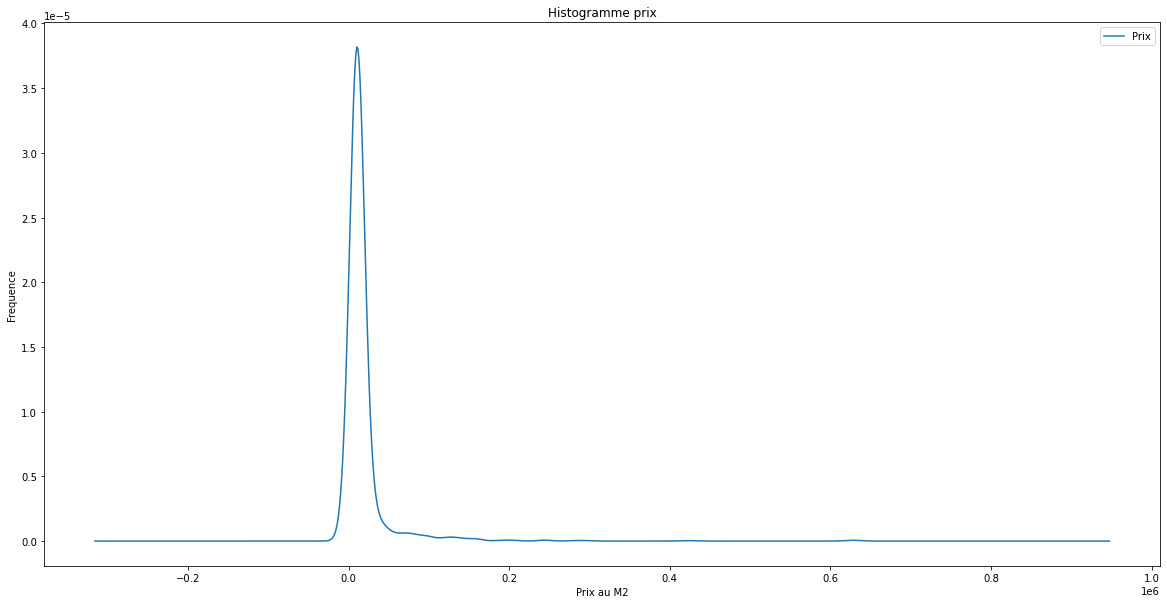

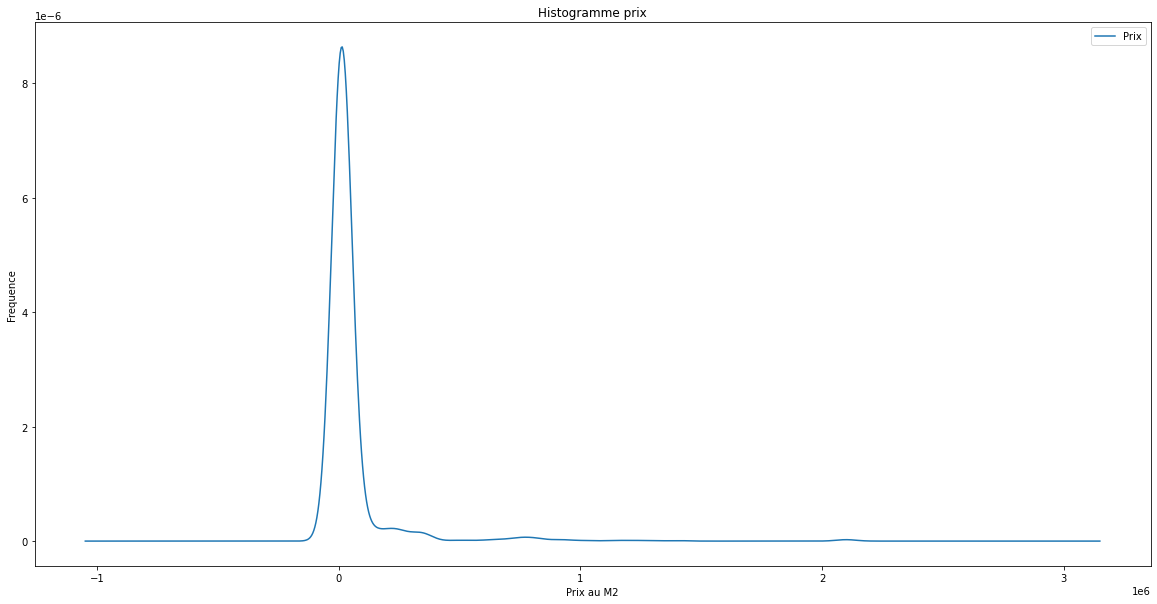

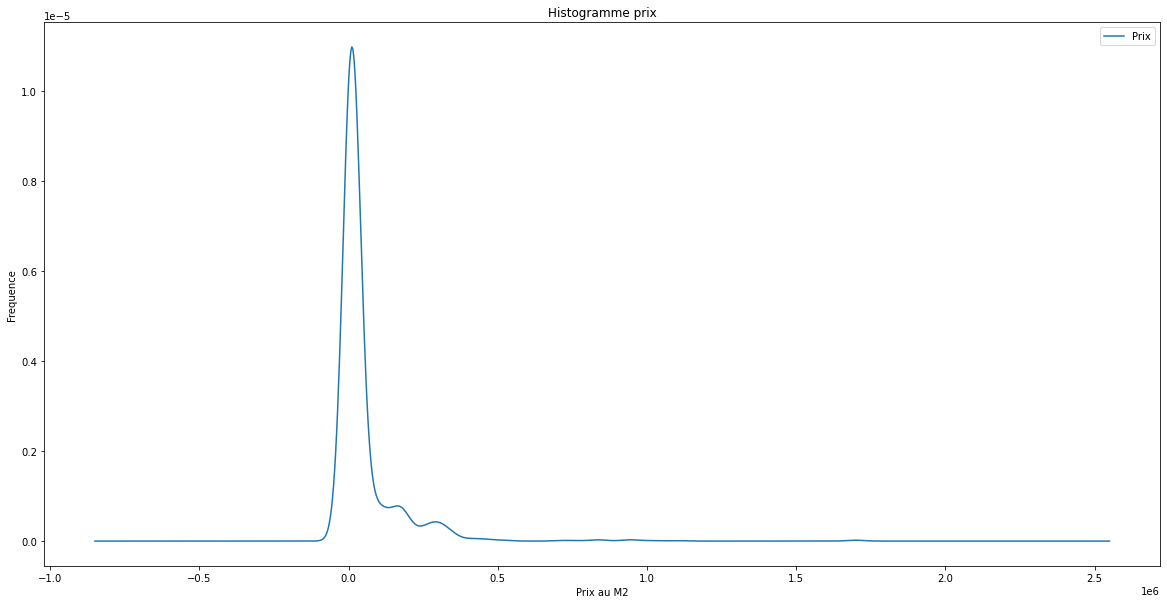

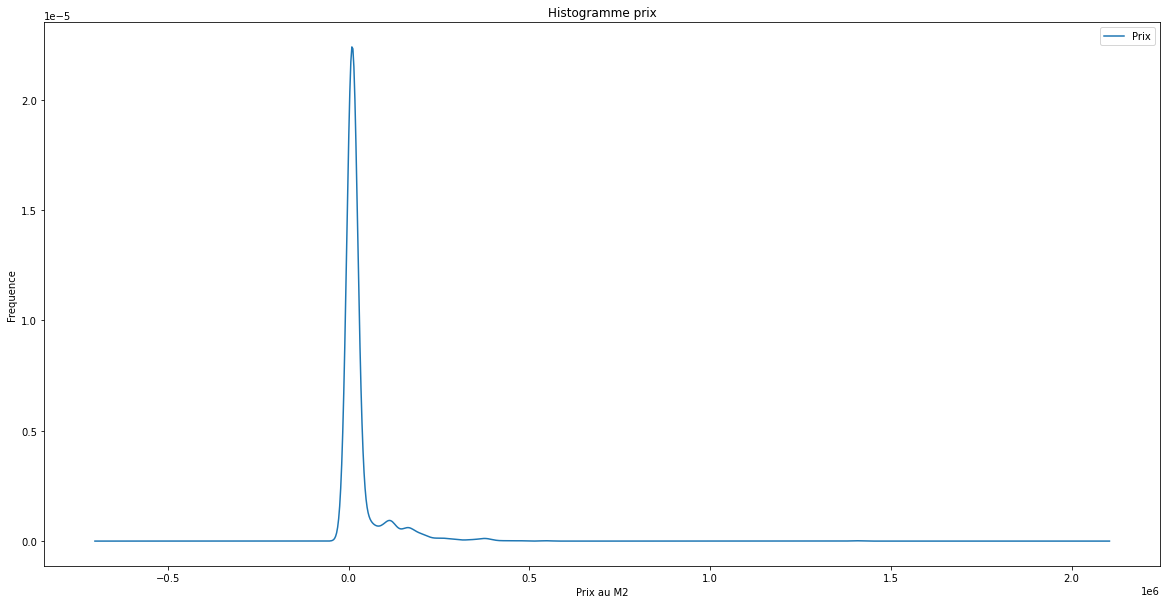

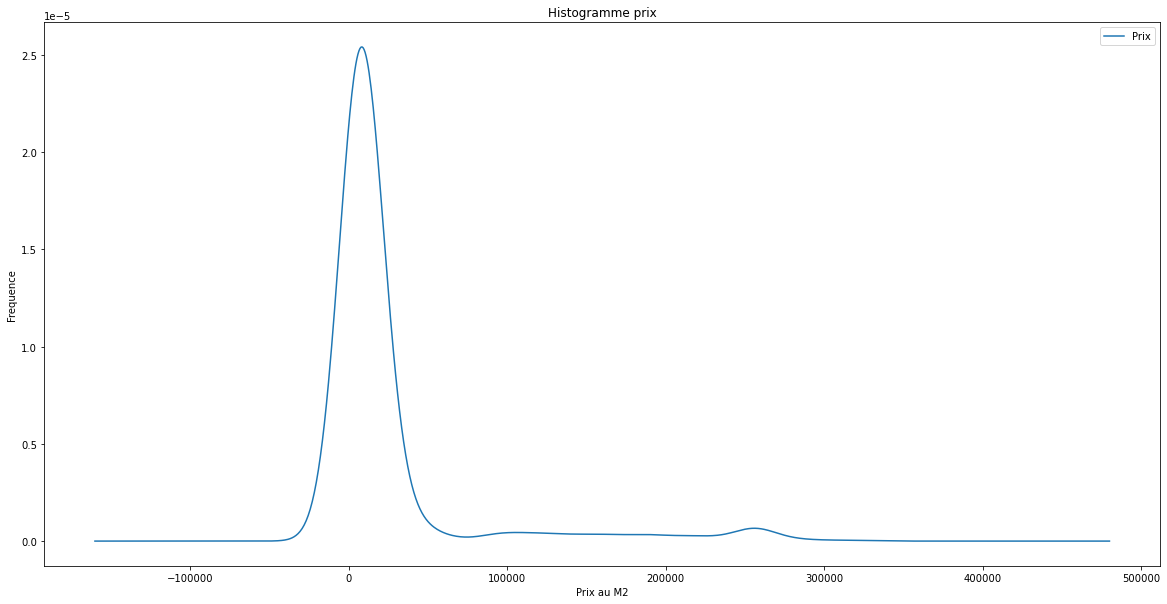

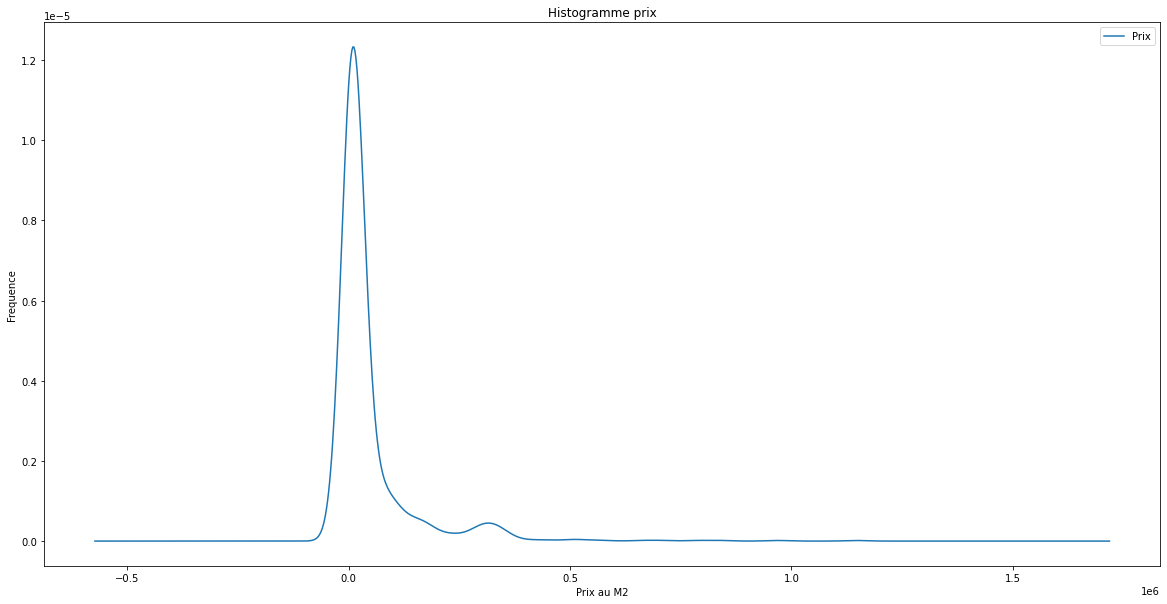

In [89]:

for com in df_joint["commune"].unique():
    plt.figure(figsize=(20,10))
    df_joint[df_joint["commune"]==com]["Prix"].plot(kind="density")
    plt.title("Histogramme prix")
    plt.xlabel("Prix au M2")
    plt.ylabel("Frequence")
    plt.legend()
    plt.show()

### Indicateur pour les valeurs de prix sortant de la normale
La loi choisie est la suivante
Prix < Q1 - 1.5*(Q3-Q1)  ou  x > Q3 + 1.5*(Q3-Q1)
où Q1 et Q3 sont respectivement les 1ers et 3e quartiles des distributions

In [90]:
df_joint["Outlier"]=False

In [91]:
def Outlier(df_func):
    Modifs=[]
    data=df_func.groupby(["commune"])["Prix"].describe()
    for com in df_func["commune"].unique():
        Q1= data["25%"][com]
        
        Q2= data["50%"][com]
        
        Q3= data["75%"][com]
        
        dg=df_func[df_func["commune"]==com]["Prix"].map(lambda x: ((x < (Q1 - 1.5*(Q3-Q1)) ) | (x > (Q3 + 1.5*(Q3-Q1)) ) ))
        
        Modifs.append(dg)
    return Modifs
            

### Test

#### data=df_joint.groupby(["commune"])["Prix"].describe()
com="75101"
Q1= data["25%"][com]
print(Q1)
Q2= data["50%"][com]
print(Q2)
Q3= data["75%"][com]
print(Q3)
dg=df_joint[df_joint["commune"]==com]["Prix"].map(lambda x: True if ((x < (Q1 - 1.5*(Q3-Q1)) ) | (x > (Q3 + 1.5*(Q3-Q1)) ) ) else False)

## Affectation des valeurs de l'indicateur outlier

In [92]:
Outlier(df_joint)[0].index

Index(['75101000AK18', '75101000AL10', '75101000AL27', '75101000AL28',
       '75101000AL3', '75101000AL33', '75101000AL9', '75101000AN17',
       '75101000AN31', '75101000AN72',
       ...
       '75101000BC77', '75101000BD21', '75101000BD21', '75101000BD31',
       '75101000BD34', '75101000BD49', '75101000BD5', '75101000BD5',
       '75101000BD6', '75101000BD7'],
      dtype='object', name='jointure', length=272)

In [119]:
def assign_outliers(données_):
    données=données_
    Communes=données["commune"].unique()

    for outlier in Outlier(données):
        for out in outlier.index:
            données.loc[out, "Outlier"]= outlier[out]

    return données[données["Outlier"]==False]

In [96]:
test=df_joint

In [101]:
df_joint_outlier_1["Outlier"].describe()

count     16784
unique        2
top       False
freq      13419
Name: Outlier, dtype: object

In [103]:
df_joint_outlier=assign_outliers(df_joint)
df_joint_outlier["Outlier"].describe()

count     16784
unique        2
top       False
freq      13419
Name: Outlier, dtype: object

### Suppression des colonnes inutiles (Trop de Nan)

In [104]:
df_joint_clean=df_joint_outlier[df_joint_outlier["Outlier"]==False]

In [433]:
column_to_remove=(df_joint_clean.isna().sum()/df_joint_clean.shape[0])[(df_joint_clean.isna().sum()/df_joint_clean.shape[0])>0.90].index

In [434]:
column_to_remove

Index(['B/T/Q', 'No Volume', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nature culture', 'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [106]:
df_joint_clean=df_joint_outlier[df_joint_outlier["Outlier"]==False].drop(["Code service CH" ,"Reference document" ,"1 Articles CGI" ,"2 Articles CGI" ,"3 Articles CGI" ,"4 Articles CGI" ,"5 Articles CGI","Identifiant local"], axis=1)
df_joint_clean

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Arrondissement,id,commune,prefixe,section,numero,contenance,created,updated,coords,Prix,Outlier
jointure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
75101000AK18,1,28/09/2020,Vente,100.0,28.0,NaN,QUAI,5824,DU LOUVRE,75001.0,PARIS 01,75,101,000,AK,18,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,110.0,2.0,NaN,NaN,NaN,75101,75101000AK0018,75101,000,AK,18,224.0,2006-10-09,2016-07-21,"[(651622.7919587007, 6862327.400295994), (6516...",0.909091,False
75101000AL10,1,23/12/2020,Vente,1220000.0,12.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,10,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,51.0,3.0,NaN,NaN,NaN,75101,75101000AL0010,75101,000,AL,10,256.0,2006-10-09,2016-07-21,"[(651791.2734951854, 6862074.719433691), (6517...",23921.568627,False
75101000AL27,1,14/09/2020,Vente,1250000.0,23.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,27,NaN,1,"62,50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,62.0,4.0,NaN,NaN,NaN,75101,75101000AL0027,75101,000,AL,27,147.0,2006-10-09,2016-07-21,"[(651703.3420849448, 6862045.939602381), (6517...",20161.290323,False
75101000AL28,1,26/08/2020,Vente,1200000.0,68.0,NaN,QUAI,6920,DES ORFEVRES,75001.0,PARIS 01,75,101,000,AL,28,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,40.0,1.0,NaN,NaN,NaN,75101,75101000AL0028,75101,000,AL,28,61.0,2006-10-09,2016-07-21,"[(651693.7920108116, 6862048.120881027), (6516...",30000.000000,False
75101000AL3,1,15/06/2020,Vente,3100000.0,24.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,3,NaN,27,"51,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,52.0,2.0,NaN,NaN,NaN,75101,75101000AL0003,75101,000,AL,3,324.0,2006-10-09,2016-07-21,"[(651720.5072086777, 6862089.375383045), (6517...",59615.384615,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75120000EC22,1,20/10/2020,Vente,834250.0,11.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,22,NaN,85,"92,75",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,94.0,5.0,NaN,NaN,NaN,75120,75120000EC0022,75120,000,EC,22,2927.0,2007-09-28,2014-11-04,"[(656703.2464831937, 6861090.670229163), (6567...",8875.000000,False
75120000EC25,1,14/01/2020,Vente,250000.0,19.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,25,NaN,28,"28,52",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,28.0,1.0,NaN,NaN,NaN,75120,75120000EC0025,75120,000,EC,25,681.0,2007-09-28,2014-11-04,"[(656756.5509782564, 6861110.776964385), (6567...",8928.571429,False
75120000EC27,1,20/11/2020,Vente,320800.0,25.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,27,NaN,11,"38,39",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,33.0,2.0,NaN,NaN,NaN,75120,75120000EC0027,75120,000,EC,27,138.0,2007-09-28,2014-11-04,"[(656772.9612026982, 6861158.113540209), (6567...",9721.212121,False


In [107]:
df_joint_clean.isna().describe()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Arrondissement,id,commune,prefixe,section,numero,contenance,created,updated,coords,Prix,Outlier
count,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419
unique,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
freq,13419,13419,13419,13419,13419,12898,13408,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,12823,9740,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,12823,13419,12823,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419


### Observons les prix par adresse

In [110]:
df_joint_clean["adresse"]=df_joint_clean["No voie"].map(str)+df_joint_clean["Type de voie"].map(str)+df_joint_clean["Voie"].map(str)+df_joint_clean["Arrondissement"].map(str)

In [111]:
df_joint_clean.groupby(["adresse"])["Prix"].describe()

,count,mean,std,min,25%,50%,75%,max
adresse,,,,,,,,
1.0AVALPHONSE XIII75116,1.0,8600.000000,NaN,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000
1.0AVDE LOWENDAL75107,2.0,15595.238095,3198.816391,13333.333333,14464.285714,15595.238095,16726.190476,17857.142857
1.0AVDE PETERHOF75117,1.0,9051.111111,NaN,9051.111111,9051.111111,9051.111111,9051.111111,9051.111111
1.0AVGAMBETTA75120,2.0,10780.797101,279.255939,10583.333333,10682.065217,10780.797101,10879.528986,10978.260870
1.0AVJEAN MOULIN75114,1.0,11636.363636,NaN,11636.363636,11636.363636,11636.363636,11636.363636,11636.363636
...,...,...,...,...,...,...,...,...
99.0RUELEGENDRE75117,1.0,9578.571429,NaN,9578.571429,9578.571429,9578.571429,9578.571429,9578.571429
99.0RUEOBERKAMPF75111,1.0,10526.315789,NaN,10526.315789,10526.315789,10526.315789,10526.315789,10526.315789
99.0RUEORDENER75118,1.0,10870.967742,NaN,10870.967742,10870.967742,10870.967742,10870.967742,10870.967742


In [112]:
df_joint_clean.groupby(["adresse"])["Prix"].describe()["std"].isna().describe()

count     8869
unique       2
top       True
freq      6323
Name: std, dtype: object

## Observation
Le prix des appartements par adresse est quasiment le même et varie très peu en fonction du No plan et de la section
Les prix de certains arrondissements sont fortement différents de la réalité qui est en moyenne en dessous de 50000 sur des sites immobiliers

In [113]:
df_joint_clean

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Arrondissement,id,commune,prefixe,section,numero,contenance,created,updated,coords,Prix,Outlier,adresse
jointure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
75101000AK18,1,28/09/2020,Vente,100.0,28.0,NaN,QUAI,5824,DU LOUVRE,75001.0,PARIS 01,75,101,000,AK,18,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,110.0,2.0,NaN,NaN,NaN,75101,75101000AK0018,75101,000,AK,18,224.0,2006-10-09,2016-07-21,"[(651622.7919587007, 6862327.400295994), (6516...",0.909091,False,28.0QUAIDU LOUVRE75101
75101000AL10,1,23/12/2020,Vente,1220000.0,12.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,10,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,51.0,3.0,NaN,NaN,NaN,75101,75101000AL0010,75101,000,AL,10,256.0,2006-10-09,2016-07-21,"[(651791.2734951854, 6862074.719433691), (6517...",23921.568627,False,12.0PLDAUPHINE75101
75101000AL27,1,14/09/2020,Vente,1250000.0,23.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,27,NaN,1,"62,50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,62.0,4.0,NaN,NaN,NaN,75101,75101000AL0027,75101,000,AL,27,147.0,2006-10-09,2016-07-21,"[(651703.3420849448, 6862045.939602381), (6517...",20161.290323,False,23.0PLDAUPHINE75101
75101000AL28,1,26/08/2020,Vente,1200000.0,68.0,NaN,QUAI,6920,DES ORFEVRES,75001.0,PARIS 01,75,101,000,AL,28,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,40.0,1.0,NaN,NaN,NaN,75101,75101000AL0028,75101,000,AL,28,61.0,2006-10-09,2016-07-21,"[(651693.7920108116, 6862048.120881027), (6516...",30000.000000,False,68.0QUAIDES ORFEVRES75101
75101000AL3,1,15/06/2020,Vente,3100000.0,24.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,3,NaN,27,"51,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,52.0,2.0,NaN,NaN,NaN,75101,75101000AL0003,75101,000,AL,3,324.0,2006-10-09,2016-07-21,"[(651720.5072086777, 6862089.375383045), (6517...",59615.384615,False,24.0PLDAUPHINE75101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75120000EC22,1,20/10/2020,Vente,834250.0,11.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,22,NaN,85,"92,75",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,94.0,5.0,NaN,NaN,NaN,75120,75120000EC0022,75120,000,EC,22,2927.0,2007-09-28,2014-11-04,"[(656703.2464831937, 6861090.670229163), (6567...",8875.000000,False,11.0BDDAVOUT75120
75120000EC25,1,14/01/2020,Vente,250000.0,19.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,25,NaN,28,"28,52",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,28.0,1.0,NaN,NaN,NaN,75120,75120000EC0025,75120,000,EC,25,681.0,2007-09-28,2014-11-04,"[(656756.5509782564, 6861110.776964385), (6567...",8928.571429,False,19.0BDDAVOUT75120
75120000EC27,1,20/11/2020,Vente,320800.0,25.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,27,NaN,11,"38,39",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,33.0,2.0,NaN,NaN,NaN,75120,75120000EC0027,75120,000,EC,27,138.0,2007-09-28,2014-11-04,"[(656772.9612026982, 6861158.113540209), (6567...",9721.212121,False,25.0BDDAVOUT75120


(0.024390243902439025, 1145454.5454545454)


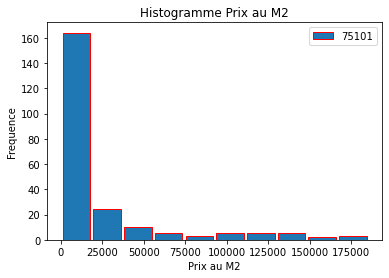

(0.024390243902439025, 1145454.5454545454)


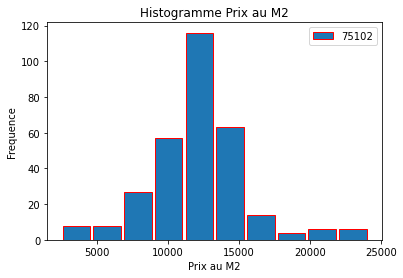

(0.024390243902439025, 1145454.5454545454)


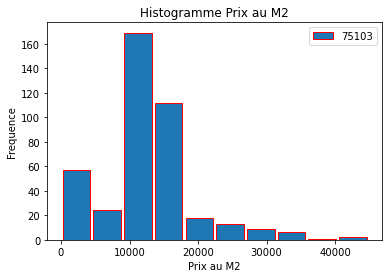

(0.024390243902439025, 1145454.5454545454)


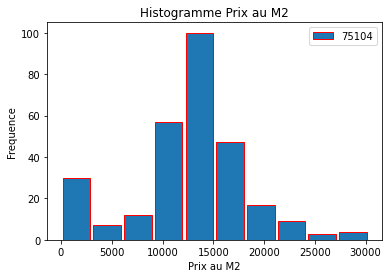

(0.024390243902439025, 1145454.5454545454)


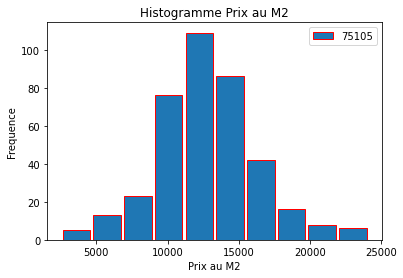

(0.024390243902439025, 1145454.5454545454)


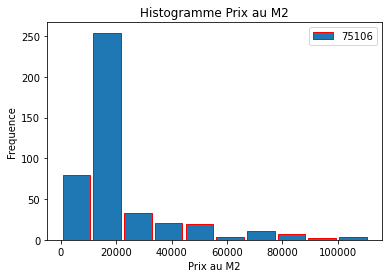

(0.024390243902439025, 1145454.5454545454)


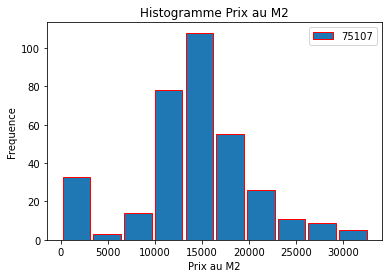

(0.024390243902439025, 1145454.5454545454)


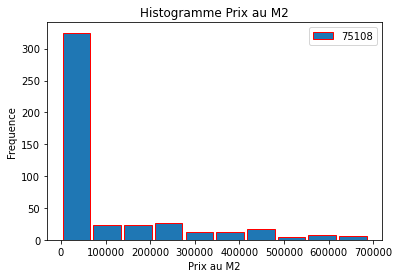

(0.024390243902439025, 1145454.5454545454)


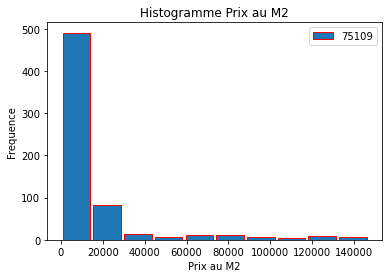

(0.024390243902439025, 1145454.5454545454)


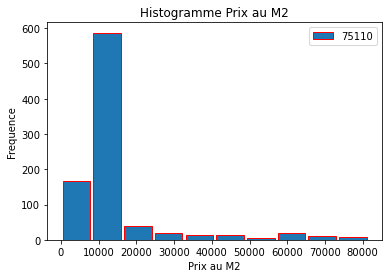

(0.024390243902439025, 1145454.5454545454)


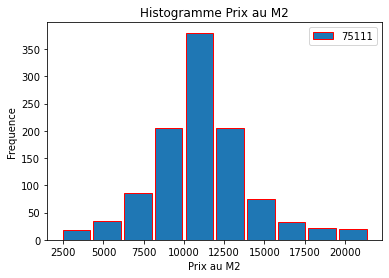

(0.024390243902439025, 1145454.5454545454)


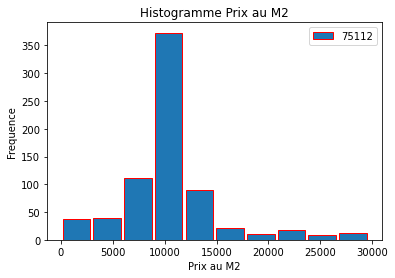

(0.024390243902439025, 1145454.5454545454)


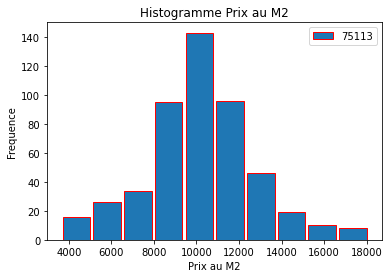

(0.024390243902439025, 1145454.5454545454)


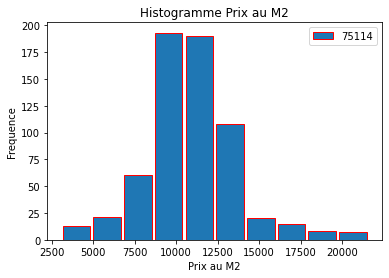

(0.024390243902439025, 1145454.5454545454)


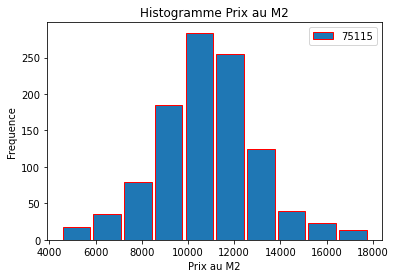

(0.024390243902439025, 1145454.5454545454)


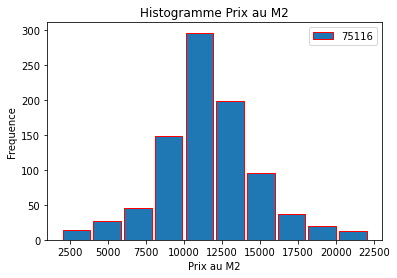

(0.024390243902439025, 1145454.5454545454)


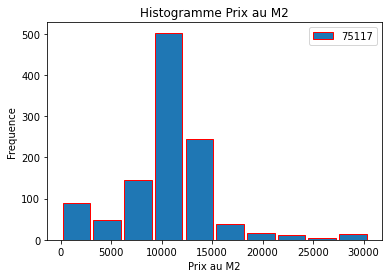

(0.024390243902439025, 1145454.5454545454)


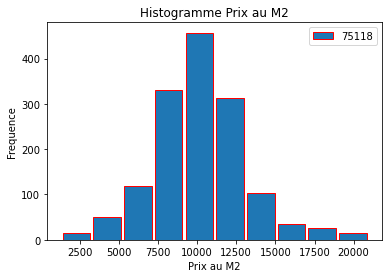

(0.024390243902439025, 1145454.5454545454)


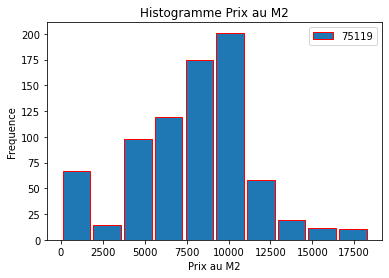

(0.024390243902439025, 1145454.5454545454)


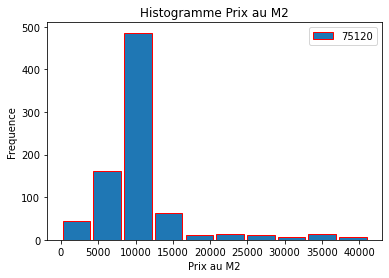

In [114]:
for com in df_joint_clean["commune"].unique():
    
    #range_hist=(df_joint_clean[df_joint["commune"]==com]["Prix"].min(),df_joint_clean[df_joint_clean["commune"]==com]["Prix"].max())
    print(range_hist)
    plt.hist(df_joint_clean[df_joint_clean["commune"]==com]["Prix"].values,rwidth=0.9,edgecolor="red", label=com)
    plt.title("Histogramme Prix au M2")
    plt.xlabel("Prix au M2")
    plt.ylabel("Frequence")
    plt.legend()
    plt.show()

## Seuil de prix
cutoff_price représente un plafond arbitraire

In [115]:
cutoff_price=50000

In [391]:
df_joint_clean.shape

(13419, 48)

In [116]:
df_joint_clean_cutoff=df_joint_clean[df_joint_clean["Prix"] < cutoff_price]

In [117]:
def Histogramme_prix(données_):
    """Utilise la colonne 'commune' du dataframe en entrée et la colonne 'Prix' 
    pour renvoyer un histogramme de prix pour chaque commune"""
    for com in données_["commune"].unique():

        plt.hist(données_[données_["commune"]==com]["Prix"].values,rwidth=0.9,edgecolor="red", label=com)
        plt.title("Histogramme Prix au M2")
        plt.xlabel("Prix au M2")
        plt.ylabel("Frequence")
        plt.legend()
        plt.show()

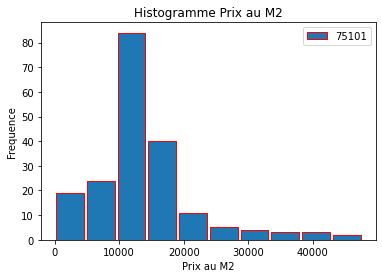

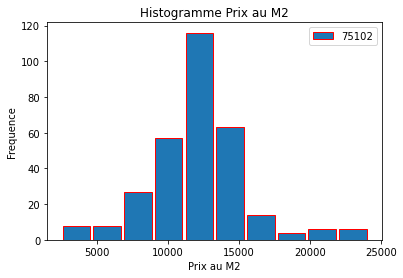

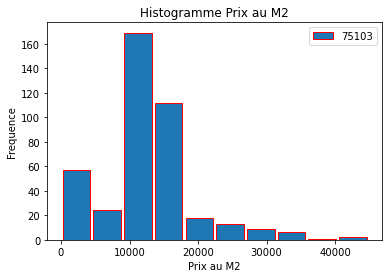

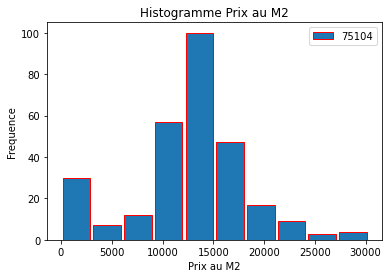

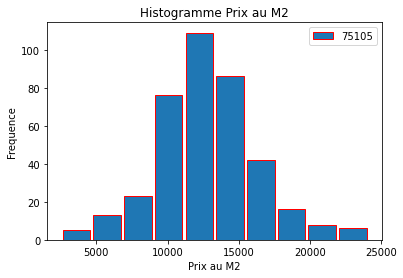

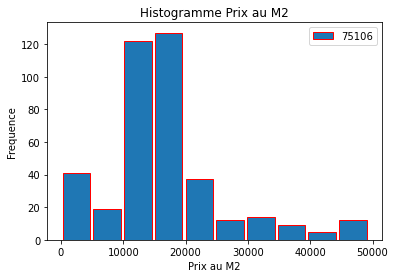

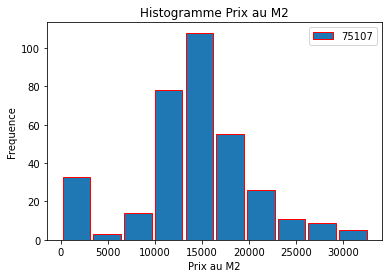

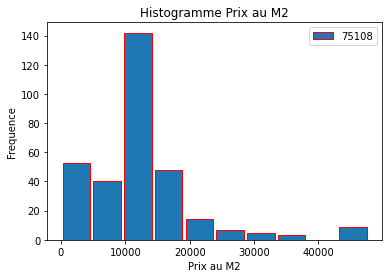

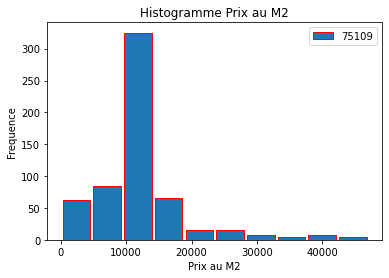

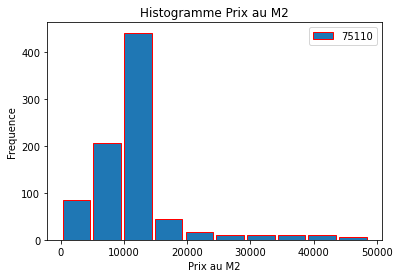

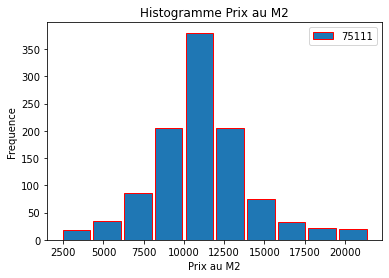

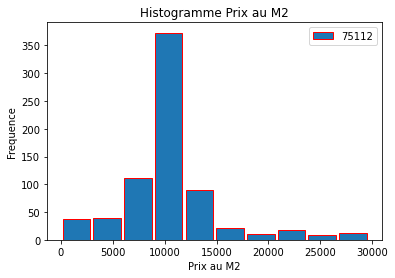

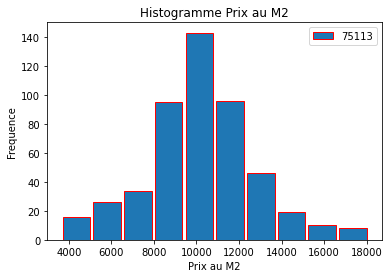

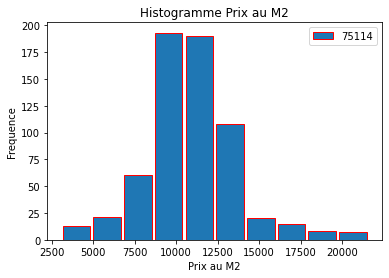

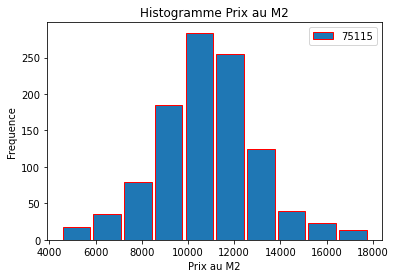

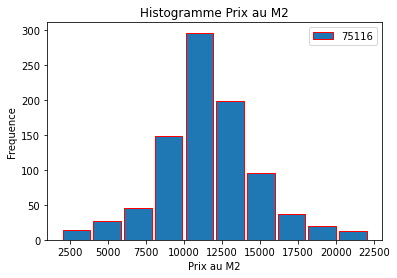

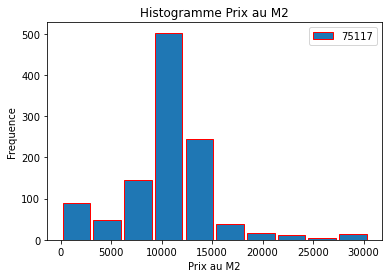

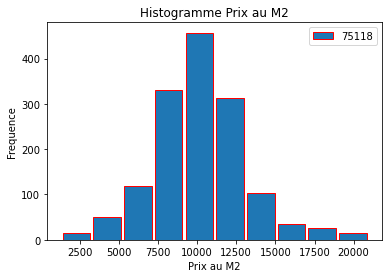

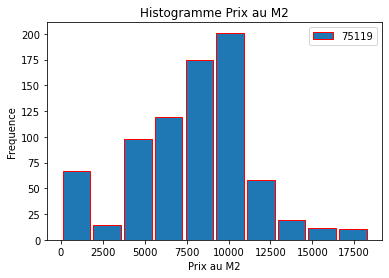

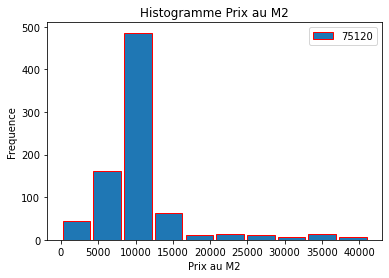

In [118]:
Histogramme_prix(df_joint_clean_cutoff)

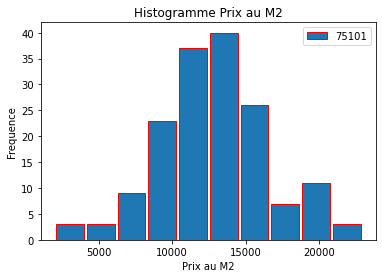

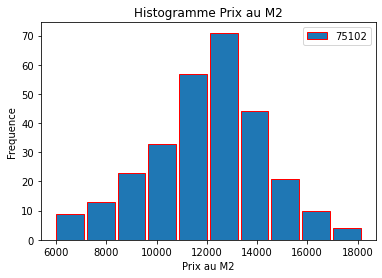

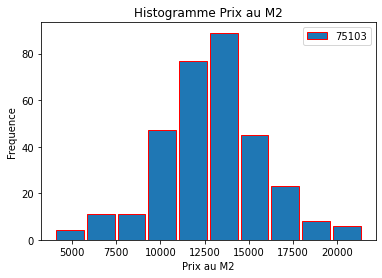

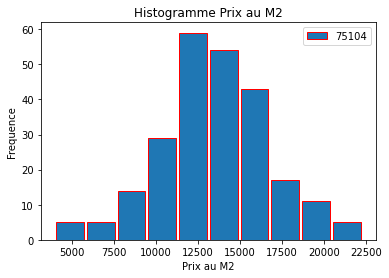

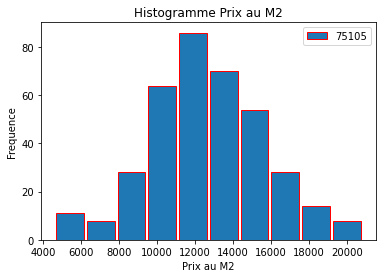

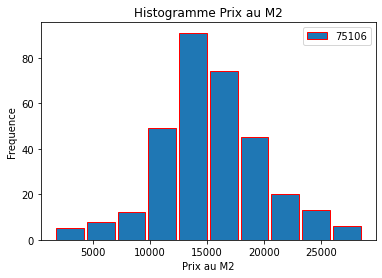

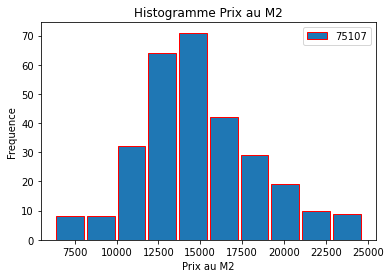

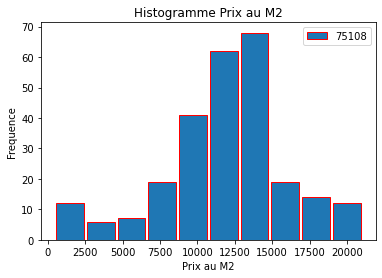

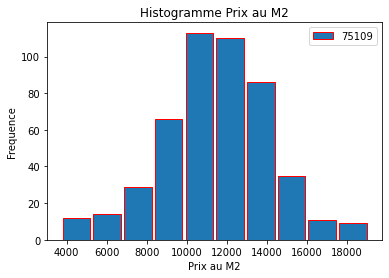

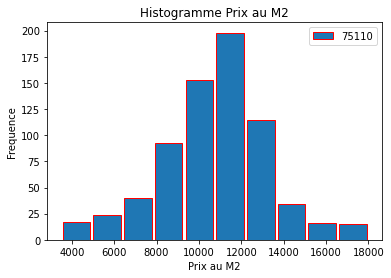

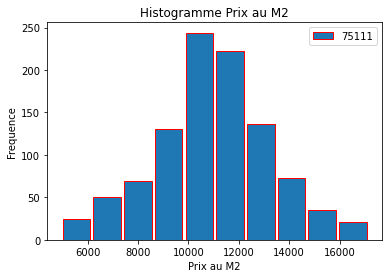

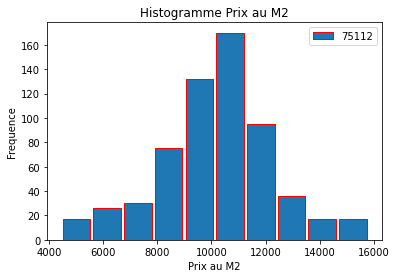

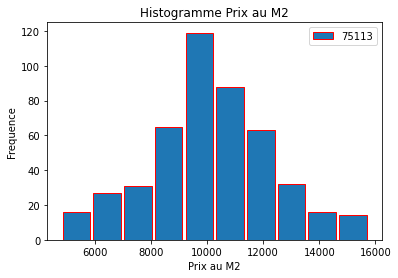

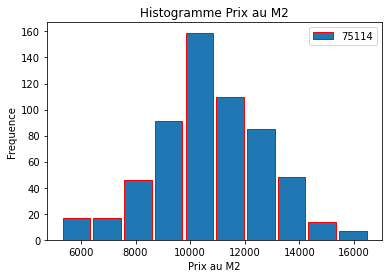

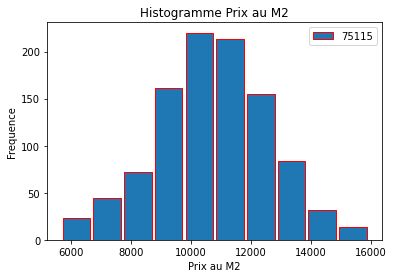

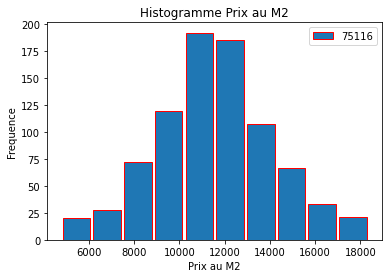

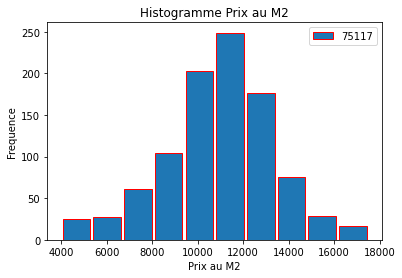

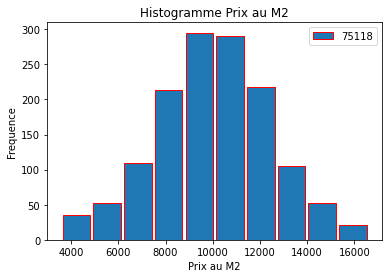

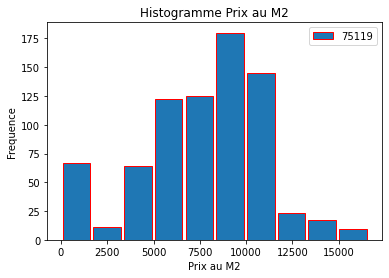

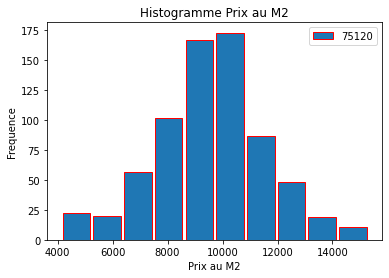

In [123]:
Histogramme_prix(df_joint_clean_cutoff_2)

In [124]:
df_joint_clean_cutoff

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Arrondissement,id,commune,prefixe,section,numero,contenance,created,updated,coords,Prix,Outlier,adresse
jointure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
75101000AK18,1,28/09/2020,Vente,100.0,28.0,NaN,QUAI,5824,DU LOUVRE,75001.0,PARIS 01,75,101,000,AK,18,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,110.0,2.0,NaN,NaN,NaN,75101,75101000AK0018,75101,000,AK,18,224.0,2006-10-09,2016-07-21,"[(651622.7919587007, 6862327.400295994), (6516...",0.909091,True,28.0QUAIDU LOUVRE75101
75101000AL10,1,23/12/2020,Vente,1220000.0,12.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,10,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,51.0,3.0,NaN,NaN,NaN,75101,75101000AL0010,75101,000,AL,10,256.0,2006-10-09,2016-07-21,"[(651791.2734951854, 6862074.719433691), (6517...",23921.568627,True,12.0PLDAUPHINE75101
75101000AL27,1,14/09/2020,Vente,1250000.0,23.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,27,NaN,1,"62,50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,62.0,4.0,NaN,NaN,NaN,75101,75101000AL0027,75101,000,AL,27,147.0,2006-10-09,2016-07-21,"[(651703.3420849448, 6862045.939602381), (6517...",20161.290323,False,23.0PLDAUPHINE75101
75101000AL28,1,26/08/2020,Vente,1200000.0,68.0,NaN,QUAI,6920,DES ORFEVRES,75001.0,PARIS 01,75,101,000,AL,28,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,40.0,1.0,NaN,NaN,NaN,75101,75101000AL0028,75101,000,AL,28,61.0,2006-10-09,2016-07-21,"[(651693.7920108116, 6862048.120881027), (6516...",30000.000000,True,68.0QUAIDES ORFEVRES75101
75101000AL33,1,02/11/2020,Vente,1035000.0,29.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,33,NaN,12,"43,71",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,50.0,1.0,NaN,NaN,NaN,75101,75101000AL0033,75101,000,AL,33,104.0,2006-10-09,2016-07-21,"[(651682.04332129, 6862064.698528506), (651688...",20700.000000,False,29.0PLDAUPHINE75101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75120000EC22,1,20/10/2020,Vente,834250.0,11.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,22,NaN,85,"92,75",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,94.0,5.0,NaN,NaN,NaN,75120,75120000EC0022,75120,000,EC,22,2927.0,2007-09-28,2014-11-04,"[(656703.2464831937, 6861090.670229163), (6567...",8875.000000,False,11.0BDDAVOUT75120
75120000EC25,1,14/01/2020,Vente,250000.0,19.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,25,NaN,28,"28,52",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,28.0,1.0,NaN,NaN,NaN,75120,75120000EC0025,75120,000,EC,25,681.0,2007-09-28,2014-11-04,"[(656756.5509782564, 6861110.776964385), (6567...",8928.571429,False,19.0BDDAVOUT75120
75120000EC27,1,20/11/2020,Vente,320800.0,25.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,27,NaN,11,"38,39",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,33.0,2.0,NaN,NaN,NaN,75120,75120000EC0027,75120,000,EC,27,138.0,2007-09-28,2014-11-04,"[(656772.9612026982, 6861158.113540209), (6567...",9721.212121,False,25.0BDDAVOUT75120


In [333]:
df_joint_clean_cutoff_2=assign_outliers(df_joint_clean_cutoff)

In [334]:
df_joint_clean_2=df_joint_clean[df_joint_clean["Outlier"]==False]

## Traitement des coordonnées geospatiales
Etant donné qu'on a plusieurs points pour définir un même appartement, on va procéder à une recherche de centroid pour chaque lieu. Le centroid sera le centre de gravité

In [125]:
import numpy as np

In [338]:
df_final=df_joint_clean_cutoff_2
df_final


,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Arrondissement,id,commune,prefixe,section,numero,contenance,created,updated,coords,Prix,Outlier,adresse,coords_X,coords_Y
jointure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
75101000AL27,1,14/09/2020,Vente,1250000.0,23.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,27,NaN,1,"62,50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,62.0,4.0,NaN,NaN,NaN,75101,75101000AL0027,75101,000,AL,27,147.0,2006-10-09,2016-07-21,"[651706.8328554494, 6862044.072548121]",20161.290323,False,23.0PLDAUPHINE75101,651706.832855,6.862044e+06
75101000AL33,1,02/11/2020,Vente,1035000.0,29.0,NaN,PL,2594,DAUPHINE,75001.0,PARIS 01,75,101,000,AL,33,NaN,12,"43,71",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,50.0,1.0,NaN,NaN,NaN,75101,75101000AL0033,75101,000,AL,33,104.0,2006-10-09,2016-07-21,"[651688.9965931154, 6862066.346058488]",20700.000000,False,29.0PLDAUPHINE75101,651688.996593,6.862066e+06
75101000AN17,1,07/07/2020,Vente,950000.0,57.0,NaN,RUE,8249,DE RIVOLI,75001.0,PARIS 01,75,101,000,AN,17,NaN,14,"117,44",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,118.0,4.0,NaN,NaN,NaN,75101,75101000AN0017,75101,000,AN,17,244.0,2006-10-09,2016-07-21,"[652003.8715175325, 6862316.373279403]",8050.847458,False,57.0RUEDE RIVOLI75101,652003.871518,6.862316e+06
75101000AN31,1,08/10/2020,Vente,300000.0,9.0,NaN,RUE,6921,DES ORFEVRES,75001.0,PARIS 01,75,101,000,AN,31,NaN,2,"28,53",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,27.0,1.0,NaN,NaN,NaN,75101,75101000AN0031,75101,000,AN,31,111.0,2006-10-09,2016-07-21,"[651955.9218848009, 6862261.051503268]",11111.111111,False,9.0RUEDES ORFEVRES75101,651955.921885,6.862261e+06
75101000AN72,1,23/12/2020,Vente,770000.0,7.0,NaN,BD,8894,DE SEBASTOPOL,75001.0,PARIS 01,75,101,000,AN,72,NaN,17,"52,63",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,59.0,2.0,NaN,NaN,NaN,75101,75101000AN0072,75101,000,AN,72,308.0,2006-10-09,2016-07-21,"[652144.5212970254, 6862242.921886223]",13050.847458,False,7.0BDDE SEBASTOPOL75101,652144.521297,6.862243e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75120000EC22,1,20/10/2020,Vente,834250.0,11.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,22,NaN,85,"92,75",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,94.0,5.0,NaN,NaN,NaN,75120,75120000EC0022,75120,000,EC,22,2927.0,2007-09-28,2014-11-04,"[656735.9348770241, 6861073.609196711]",8875.000000,False,11.0BDDAVOUT75120,656735.934877,6.861074e+06
75120000EC25,1,14/01/2020,Vente,250000.0,19.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,25,NaN,28,"28,52",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,28.0,1.0,NaN,NaN,NaN,75120,75120000EC0025,75120,000,EC,25,681.0,2007-09-28,2014-11-04,"[656768.3537734457, 6861121.042963294]",8928.571429,False,19.0BDDAVOUT75120,656768.353773,6.861121e+06
75120000EC27,1,20/11/2020,Vente,320800.0,25.0,NaN,BD,2608,DAVOUT,75020.0,PARIS 20,75,120,000,EC,27,NaN,11,"38,39",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,33.0,2.0,NaN,NaN,NaN,75120,75120000EC0027,75120,000,EC,27,138.0,2007-09-28,2014-11-04,"[656777.6843338875, 6861150.603281722]",9721.212121,False,25.0BDDAVOUT75120,656777.684334,6.861151e+06


## On ressort le centroid des coordonnées des habitations

In [339]:
df_final["coords"]=df_final["coords"].map(lambda x: [np.mean([x[i][0] for i in range(0,len(x)) ]),np.mean([x[i][1] for i in range(0,len(x))])])

IndexError: invalid index to scalar variable.

In [340]:
df_final["coords"]

jointure
75101000AL27    [651706.8328554494, 6862044.072548121]
75101000AL33    [651688.9965931154, 6862066.346058488]
75101000AN17    [652003.8715175325, 6862316.373279403]
75101000AN31    [651955.9218848009, 6862261.051503268]
75101000AN72    [652144.5212970254, 6862242.921886223]
                                 ...                  
75120000EC22    [656735.9348770241, 6861073.609196711]
75120000EC25    [656768.3537734457, 6861121.042963294]
75120000EC27    [656777.6843338875, 6861150.603281722]
75120000EC28    [656765.6514292042, 6861147.945001082]
75120000EC28    [656765.6514292042, 6861147.945001082]
Name: coords, Length: 11821, dtype: object

In [341]:
df_final["coords_X"]=df_final["coords"].map(lambda x: x[0])
df_final["coords_Y"]=df_final["coords"].map(lambda x: x[1])

In [342]:
df_final["coords_X"]

jointure
75101000AL27    651706.832855
75101000AL33    651688.996593
75101000AN17    652003.871518
75101000AN31    651955.921885
75101000AN72    652144.521297
                    ...      
75120000EC22    656735.934877
75120000EC25    656768.353773
75120000EC27    656777.684334
75120000EC28    656765.651429
75120000EC28    656765.651429
Name: coords_X, Length: 11821, dtype: float64

In [343]:
df_final["coords_Y"]

jointure
75101000AL27    6.862044e+06
75101000AL33    6.862066e+06
75101000AN17    6.862316e+06
75101000AN31    6.862261e+06
75101000AN72    6.862243e+06
                    ...     
75120000EC22    6.861074e+06
75120000EC25    6.861121e+06
75120000EC27    6.861151e+06
75120000EC28    6.861148e+06
75120000EC28    6.861148e+06
Name: coords_Y, Length: 11821, dtype: float64

## Modélisation du KNN

In [344]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [345]:
from sklearn.neighbors import KNeighborsClassifier, BallTree, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [404]:
X=df_final[["coords_X","coords_Y","Arrondissement","Prix","coords"]]
Y=df_final["Arrondissement"]

In [223]:
test=df_joint_clean[df_joint_clean["Prix"]>cutoff_price]["coords"].map(lambda x: [np.mean([x[i][0] for i in range(0,len(x)) ]),np.mean([x[i][1] for i in range(0,len(x))])])

In [224]:
testt=pd.DataFrame()

In [225]:
testt["coords"]=test


In [226]:
testt["coords_X"]=testt["coords"].map(lambda x: x[0])
testt["coords_Y"]=testt["coords"].map(lambda x: x[1])

In [227]:
testt.shape

(299, 3)

In [228]:
test_m=MinMaxScaler().fit_transform(testt[["coords_X","coords_Y"]])

In [405]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1, random_state=49, stratify=Y)

In [406]:
X_train["Arrondissement"].unique().size

20

In [407]:
X_test["Arrondissement"].unique().size

20

In [328]:
np.sqrt(np.square(np.subtract(X_test["Prix"].values,model.predict(X_test_m)))/n)

array([ 11.84967102,  27.54940238, 116.47336594, ..., 226.08254918,
        29.93723601, 102.55109781])

In [428]:
Liste_models=[]
Liste_erreur=[]
Liste_param=[]
for n_neighbors in range(60,71):
    for weights in ['uniform','distance']:
            for metric in ['euclidean','manhattan']:
                for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
                    model=KNeighborsRegressor(n_neighbors=n_neighbors, metric=metric, weights=weights, algorithm=algorithm)
                    Liste_models.append(model)
                    Liste_param.append([n_neighbors, metric, weights, algorithm])
                    model.fit(X_train[["coords_X","coords_Y","Arrondissement"]],X_train["Prix"])
                    #model.predict(X_test_m)
                    n=X_test["Prix"].values.size
                    #erreur= np.sqrt(np.square(np.subtract(X_test["Prix"].values,model.predict(X_test_m))).mean())
                    erreur=np.sqrt(mean_squared_error(X_test["Prix"].values,model.predict(X_test[["coords_X","coords_Y","Arrondissement"]])))
                    Liste_erreur.append(erreur)
maxi=0
for i in range(0,len(Liste_models)):
    if(Liste_erreur[i] < Liste_erreur[maxi]):
        maxi=i
best_model=Liste_models[maxi]

### 1ere observation:
params: [120, 'manhattan', 'distance', 'auto'] erreur: 

### 2e observation: cutoff+2e passage ouliers
params: [70, 'euclidean', 'distance', 'ball_tree']

In [429]:
Liste_param[maxi]

[67, 'manhattan', 'uniform', 'brute']

In [430]:
Liste_erreur[maxi]

2535.2417816425623

In [424]:
model=KNeighborsRegressor(n_neighbors=300, metric='haversine', weights='distance', algorithm='ball_tree')

In [425]:
model.fit(X_train[["coords_X","coords_Y","Arrondissement"]],X_train["Prix"])

KNeighborsRegressor(algorithm='ball_tree', metric='haversine', n_neighbors=300,
                    weights='distance')

In [426]:
erreur= st.sqrt(mean_squared_error(X_test["Prix"].values,model.predict(X_test[["coords_X","coords_Y"]])))
erreur

2938.7162316266563

In [393]:
best_model.fit(X_train_m,np.log(X_train["Prix"]))

erreur= st.sqrt(mean_squared_error(X_test["Prix"].values,np.exp(best_model.predict(X_test_m))))
erreur

2561.2570097042703

In [368]:
from sklearn.linear_model import LinearRegression,Ridge

In [380]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [382]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_m, X_train["Prix"].values)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [383]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [384]:
RdmF=RandomForestRegressor(n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features='sqrt', max_depth=10, bootstrap=True)

In [431]:
RdmF.fit(X_train[["coords_X","coords_Y","Arrondissement"]],X_train["Prix"])

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=1000)

In [432]:
np.sqrt(mean_squared_error(X_test["Prix"].values,RdmF.predict(X_test[["coords_X","coords_Y","Arrondissement"]])))

2498.0633997338805

In [390]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "n_neighbors": [50,60,80,100,120,150,200,250,350],
    "weights": ['uniform','distance'],
    "metric": ['euclidean','manhattan','haversine'],
    "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']
}
gs=GridSearchCV(LinearRegression()a,
               grid_params,
               verbose=1,
               cv=3,
               n_jobs=-1)



SyntaxError: invalid syntax (<ipython-input-390-61f629afdf17>, line 1)

In [280]:
X_train_s=StandardScaler().fit_transform(X_train[["coords_X","coords_Y"]])
X_test_s=StandardScaler().fit_transform(X_test[["coords_X","coords_Y"]])

In [350]:
X_train_m=MinMaxScaler().fit_transform(X_train[["coords_X","coords_Y"]])
X_test_m=MinMaxScaler().fit_transform(X_test[["coords_X","coords_Y"]])

In [174]:
X.shape

(13120, 4)

In [191]:
X_m=MinMaxScaler().fit_transform(X[["coords_X","coords_Y"]])


In [ ]:
test=df

In [282]:
gs_results= gs.fit(X_m, X["Prix"])

Fitting 2 folds for each of 144 candidates, totalling 288 fits


In [283]:
gs_results.best_params_

{'algorithm': 'brute',
 'metric': 'manhattan',
 'n_neighbors': 100,
 'weights': 'distance'}

In [284]:
knn_immo=KNeighborsRegressor(n_neighbors=100, metric="euclidean", weights="distance", algorithm="ball_tree")

In [286]:
knn_immo.fit(X_train_m, X_train["Prix"])

KNeighborsRegressor(algorithm='brute', metric='euclidean', n_neighbors=100,
                    weights='distance')

In [288]:
knn_immo.score(X_test_m,X_test["Prix"])

0.20748203456980963

In [289]:
from sklearn.metrics import mean_squared_error

In [293]:
X_test["Prix"].values.size

1312

In [294]:
X_test_m.shape

(1312, 2)

In [295]:
erreur=st.sqrt(mean_squared_error(X_test["Prix"].values,knn_immo.predict(X_test_m)))

In [296]:
erreur

4849.034962894344

In [257]:
knn_immo.predict(test_m)

array([13291.17366806, 13444.91407653, 13444.91407653, 13444.91407653,
       13444.91407653, 13444.91407653, 13444.91407653, 13444.91407653,
       13444.91407653, 13444.91407653, 11683.60054041, 11683.60054041,
       11683.60054041, 11683.60054041, 11683.60054041, 11683.60054041,
       13758.70642043, 13758.70642043, 13758.70642043, 13758.70642043,
       13758.70642043, 13977.35470875, 13558.55497234, 13558.55497234,
       13558.55497234, 14097.3415971 , 14242.50881571, 15026.08125828,
       15026.08125828, 14432.2472237 , 14432.2472237 , 12821.64203957,
       10677.29689519, 11671.7962931 , 12220.56673848,  9992.94831759,
        9913.32465753,  9913.32465753,  9592.2519039 ,  9588.53809359,
        9588.53809359,  9468.44502174,  9860.50203526,  9860.50203526,
        9860.50203526,  9860.50203526,  9860.50203526,  9860.50203526,
        9860.50203526,  9860.50203526,  9860.50203526,  9860.50203526,
        9860.50203526,  9860.50203526,  9860.50203526,  9860.50203526,
      

In [258]:
df_joint_clean[df_joint_clean["Prix"]>cutoff_price]["coords"].map(lambda x: [np.mean([x[i][0] for i in range(0,len(x)) ]),np.mean([x[i][1] for i in range(0,len(x))])]).shape

(299,)

In [259]:
df_joint_clean[df_joint_clean["Prix"]>cutoff_price]["coords"].shape

(299,)

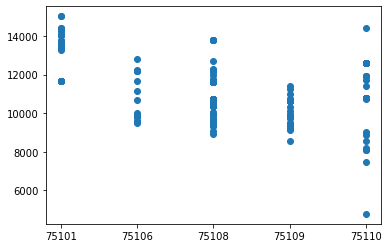

In [261]:
plt.scatter(df_joint_clean[df_joint_clean["Prix"]>cutoff_price]["Arrondissement"].values,knn_immo.predict(test_m))

In [262]:
prediction=pd.DataFrame()

In [263]:
prediction["Prix_prédit"]=knn_immo.predict(test_m)

In [264]:
prediction["Arrondissement"]=df_joint_clean[df_joint_clean["Prix"]>cutoff_price]["Arrondissement"].values

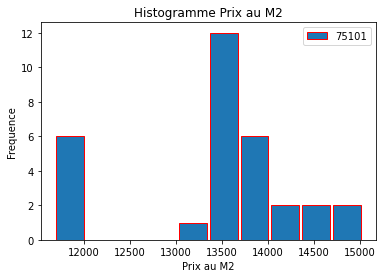

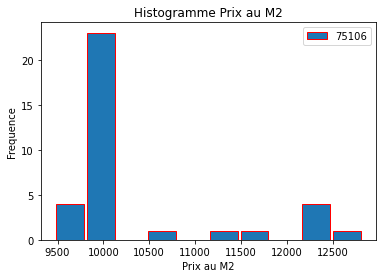

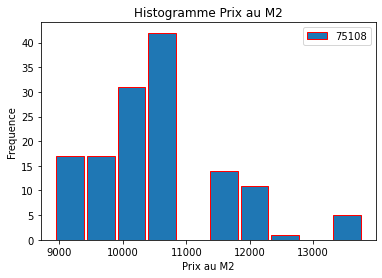

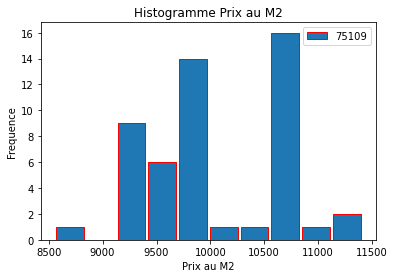

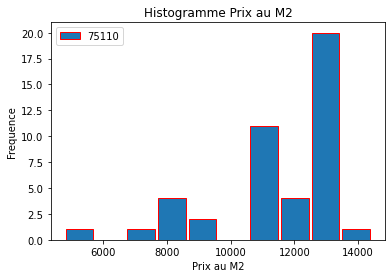

In [265]:
for com in prediction["Arrondissement"].unique():

        plt.hist(prediction[prediction["Arrondissement"]==com]["Prix_prédit"].values,rwidth=0.9,edgecolor="red", label=com)
        plt.title("Histogramme Prix au M2")
        plt.xlabel("Prix au M2")
        plt.ylabel("Frequence")
        plt.legend()
        plt.show()

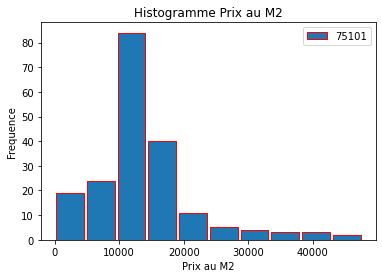

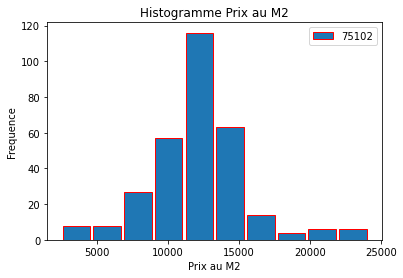

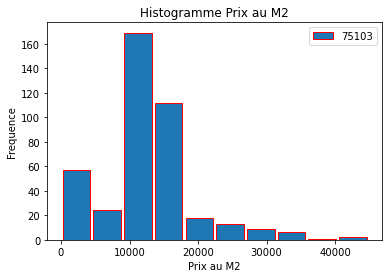

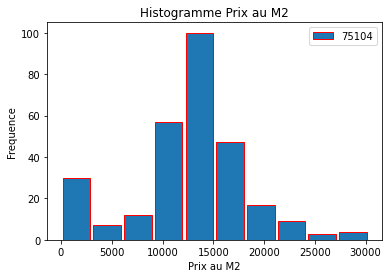

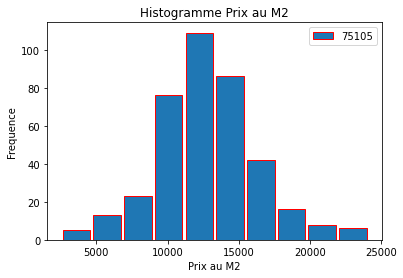

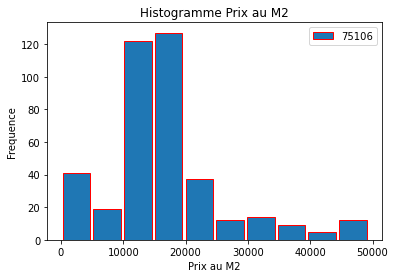

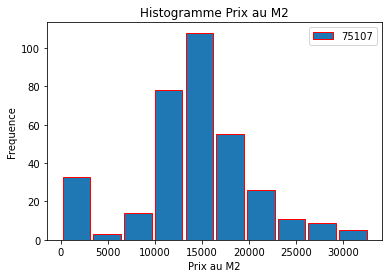

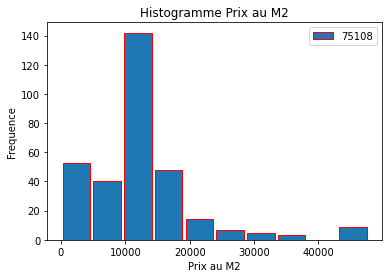

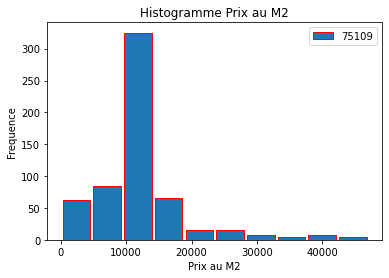

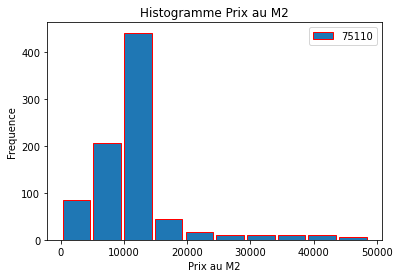

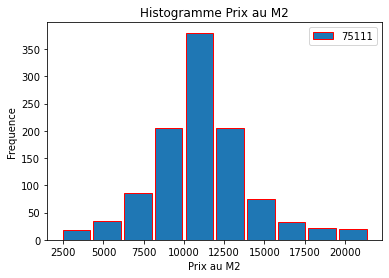

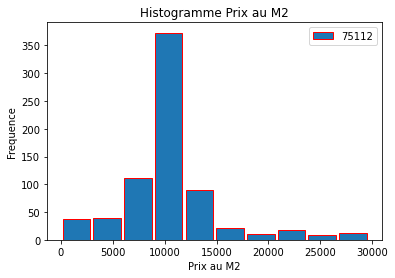

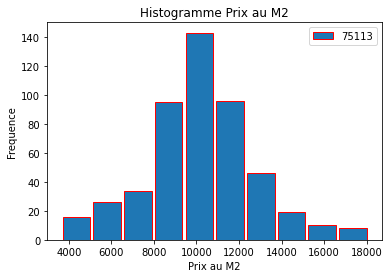

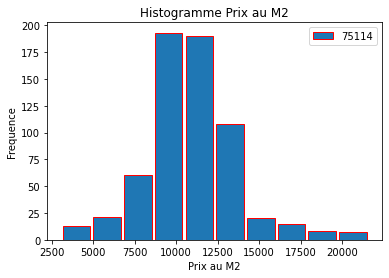

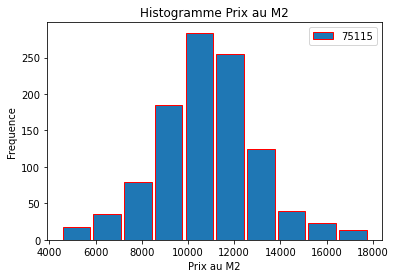

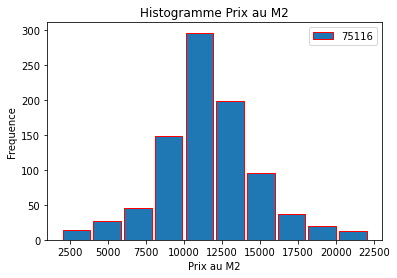

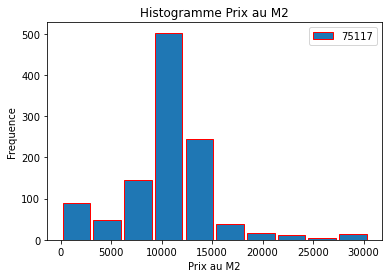

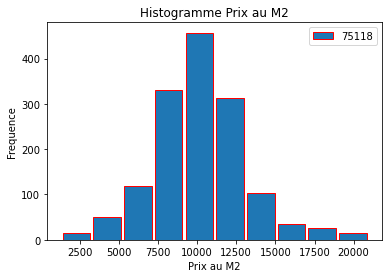

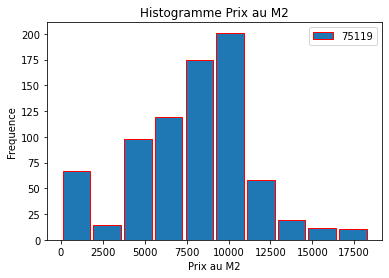

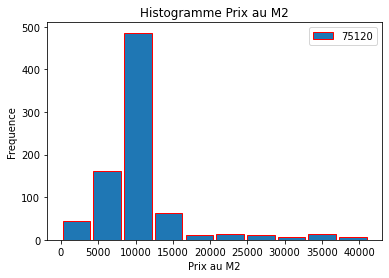

In [266]:
Histogramme_prix(df_joint_clean_cutoff)

In [267]:
import statistics as st

In [273]:
for com in df_joint_clean_cutoff["commune"].unique():
    print(st.stdev(df_joint_clean_cutoff[df_joint_clean_cutoff["commune"]==com]["Prix"].values))

8203.903596512908
3328.268112297774
7113.099544758926
5849.038614966035
3464.9263659630615
9863.999045566285
6387.688437860402
8739.744344453793
7044.636796926657
7169.411277496869
3029.733211634243
4674.9661478656335
2526.4088896040917
2722.0998885424065
2175.6495747264776
3195.4921797354027
4639.8573960038275
2951.668177630782
3395.180629091589
6030.148786974911


In [274]:
for com in prediction["Arrondissement"].unique():
    print(st.stdev(prediction[prediction["Arrondissement"]==com]["Prix_prédit"].values))

955.1757921991276
939.3974647305254
1067.1528145415848
631.7685036330341
1895.0774691109193


In [ ]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
def()
    R = 6373.0

    lat1 = radians(52.2296756)
    lon1 = radians(21.0122287)
    lat2 = radians(52.406374)
    lon2 = radians(16.9251681)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

### test